In [1]:
from astropy.table import Table
import matplotlib.pyplot as plt
import math
import numpy
#Imports possibly useful software for Python
t=Table.read('Tgas200_Wright2003_2MASS_FinCat_out.vot')
#t=Table.read('TGAS_d125_Wright03_2Mass.vot')
#Defines t as this table
print("The columns within this catalog are: ")
print(t.colnames)
#Prints out all of the column names for easy reference
Jmag=t["Jmag"]
#Defines Jmag from the Jmag array
Hmag=t["Hmag"]
#Defines Hmag from the Hmag array
Kmag=t["Kmag"]
#Defines Kmag from the Kmag array
Vmag=t["VTmag"]
#Defines Vmag from the array VTmag in the table
Gmag=t["X.Gmag."]
#Defines Gmag from the __Gmag_ array
Bmag=t["BTmag"]
#Defines Bmag from the BTmag array
Jmagerror=t["e_Jmag"]
#Defines the J magnitude error from the table
Hmagerror=t["e_Hmag"]
#Defines the H magnitude error from the table
Kmagerror=t["e_Kmag"]
#Defines the K magnitude error from the table
SpType=t["SpType"]
#Defines SpectralType from the table
QFlags=t["Qfl"]
#Defines QFlags from the Qfl array
Source=t["Source"]
#Defines Source from the table array
HipparcosIdentifier=t["HIP"]
#Defines HipparcosIdentifier from the HIP array

The columns within this catalog are: 
['col1', 'angDist', 'd_arcsec', 'X_RAJ2000', 'X_DEJ2000', 'HIP', 'TYC2', 'Source', 'RA_ICRS', 'e_RA_ICRS', 'DE_ICRS', 'e_DE_ICRS', 'Plx', 'e_Plx', 'pmRA', 'e_pmRA', 'pmDE', 'e_pmDE', 'Dup', 'X.FG.', 'e_.FG.', 'X.Gmag.', 'Var', 'X_RAJ2000.1', 'X_DEJ2000.1', 'TYC1', 'TYC2.1', 'TYC3', 'RAJ2000', 'DEJ2000', 'VTmag', 'BTmag', 'r_SpType', 'Dist', 'Teff', 'SpType', 'X2MASS', 'RAJ2000.1', 'DEJ2000.1', 'errHalfMaj', 'errHalfMin', 'errPosAng', 'Jmag', 'Hmag', 'Kmag', 'e_Jmag', 'e_Hmag', 'e_Kmag', 'Qfl', 'Rfl', 'X', 'MeasureJD']


In [2]:
for i in range(0,len(QFlags)):
    if(QFlags[i][0]==ord("A")):
         Jmag.mask[i]=False
         Jmagerror.mask[i]=False
    else:
         Jmag.mask[i]=True
         Jmagerror.mask[i]=True
         #SpType.mask[i]=True
#The first character of QFlags represents J. Checks whether the first character is A. If it is, the mask on that element
#should be false (off), and if it isn't, the mask on that element should be true (on).
for i in range(0,len(QFlags)):
    if(QFlags[i][1]==ord("A")):
         Hmag.mask[i]=False
         Hmagerror.mask[i]=False
    else:
         Hmag.mask[i]=True
         Hmagerror.mask[i]=True
         #SpType.mask[i]=True
#The second character of QFlags represents H. Checks whether the first character is A. If it is, the mask on that element
#should be false (off), and if it isn't, the mask on that element should be true (on).
for i in range(0,len(QFlags)):
    if(QFlags[i][2]==ord("A")):
         Kmag.mask[i]=False
         Kmagerror.mask[i]=False
    else:
         Kmag.mask[i]=True
         Kmagerror.mask[i]=True
         #SpType.mask[i]=True
#The third character of QFlags represents K. Checks whether the first character is A. If it is, the mask on that element
#should be false (off), and if it isn't, the mask on that element should be true (on).

In [3]:
Duplicates=t["Dup"]
#Defines Duplicates from the array of duplicates Dup in the table
DuplicateMask=0
for i in range(0,len(Duplicates)):
    if Duplicates[i]>0.5:
        DuplicateMask=DuplicateMask+1
        Row=t[i]
        Index=Row._index
        Columns=row._table.columns.values()
        for j in Columns:
            Columns.mask[i]=True
for k in range(0,len(Duplicates)):
    if Duplicates[k]>0.5:
        print(k,Duplicates[k])

In [4]:
Distance=1000./t["Plx"]
#Defines the distance to the stars
Jabsmag=Jmag+5-5*numpy.log10(Distance)
Habsmag=Hmag+5-5*numpy.log10(Distance)
Kabsmag=Kmag+5-5*numpy.log10(Distance)
Gabsmag=Gmag+5-5*numpy.log10(Distance)
Vabsmag=Vmag+5-5*numpy.log10(Distance)
Babsmag=Bmag+5-5*numpy.log10(Distance)

In [5]:
TranslatedLuminosityClass=[0.0]*len(SpType)
#Makes this an array of 0's with the same length as SpectralType
for i in range(0,len(SpType)):
    SpT=SpType[i].decode()
    if len(SpT)>2:
        for j in range(0,len(SpT)):
            if SpT[j]=='I':
                TranslatedLuminosityClass[i]=TranslatedLuminosityClass[i]+1
            if SpT[j]=='V':
                TranslatedLuminosityClass[i]=TranslatedLuminosityClass[i]+5
            if SpT[j]=='+':
                TranslatedLuminosityClass[i]=TranslatedLuminosityClass[i]-30
    else:
        TranslatedLuminosityClass[i]=5.1
    if TranslatedLuminosityClass[i]==6:
        TranslatedLuminosityClass[i]=4
    if TranslatedLuminosityClass[i]==11:
        TranslatedLuminosityClass[i]=4.5
    if TranslatedLuminosityClass[i]==9:
        TranslatedLuminosityClass[i]=3.5
    if TranslatedLuminosityClass[i]>5.2:
        TranslatedLuminosityClass[i]=TranslatedLuminosityClass[i]-30
#Runs a loop that "translates" luminosity classes into Arabic numerals, 5.1 for no class, negative numbers for binaries or weird stars, or half-integer numbers for slash stars
BinariesOrUnknownClass=0
#Sets this number at 0
for k in range(0,len(SpType)):
    if TranslatedLuminosityClass[k]<0 or TranslatedLuminosityClass[k]>5:
        BinariesOrUnknownClass=BinariesOrUnknownClass+1
        #Adds 1 to number of binary/unknwon luminosity class stars for "translated" class less than 0 or greater than 5
SingleStarsWithKnownLuminosityClass=len(SpType)-BinariesOrUnknownClass
print('The number of single stars with known luminosity class is: ')
print(SingleStarsWithKnownLuminosityClass)
print('The number of binary stars or stars with unknown luminosity class is: ')
print(BinariesOrUnknownClass)
#Prints out the number of single stars with known luminosity class, and binary stars or stars without a luminosity class
print('The "translated" luminosity classes are: ')
print(TranslatedLuminosityClass)
#Prints out the vector of "translated" luminosity class numbers
#Luminosity classes get turned into number from 1 to 5
#Stars with no luminosity class have "translated" class 5.1
#Unknown spectral type stars and binary stars have negative "translated" class numbers
#Stars with "translated" class numbers halfway between numbers (i.e. 3.5, 4.5, etc.) had slashes (i.e. III/IV)

The number of single stars with known luminosity class is: 
27501
The number of binary stars or stars with unknown luminosity class is: 
22592
The "translated" luminosity classes are: 
[5.1, 5.1, 5.0, 5.1, 3.0, 5.1, 5.1, 5.1, 5.1, 5.0, 0.0, 5.1, 3.0, 5.1, 5.0, 5.1, 4, 5.1, 3.0, 3.5, 5.0, 5.1, 5.1, 5.0, 5.1, 5.1, 5.0, 5.1, 5.0, 5.0, 5.0, 5.0, 4, 5.0, 3.0, 5.1, 5.1, 5.0, 5.1, 5.0, 5.1, 5.0, 5.1, 5.0, 5.0, 5.1, 4, 4, 5.1, 5.0, 5.0, 5.0, 5.1, 5.1, 5.0, 5.0, 5.1, 5.0, 5.0, 5.1, 4, 5.0, 3.0, 5.0, 3.5, 5.1, 4, -30.0, 5.0, 5.1, 5.0, 5.0, 4.5, 5.0, 5.1, 5.0, 5.1, 5.1, 4.5, 5.0, 5.0, 4, 5.0, 5.0, 3.0, 5.1, 5.0, 5.1, 5.0, 5.1, 5.1, 5.0, 5.0, 5.1, 5.0, 5.0, 5.1, 5.0, 5.0, 5.0, 5.1, 5.0, 5.1, 3.0, 5.0, 5.1, 4, 3.0, 5.0, 5.0, 0.0, 5.0, 5.0, 3.0, 5.1, 5.0, 5.1, 5.0, 5.1, 5.0, 5.0, 5.0, 5.1, 5.0, 4.5, 5.1, -25.0, 5.1, 5.1, 5.0, 3.5, 5.0, 5.0, 5.0, 5.0, 5.1, 5.0, 5.0, 5.1, 5.0, 5.1, 5.0, 5.1, 5.1, 0.0, 5.1, 5.1, 5.0, -30.0, 5.0, -27.0, 5.1, 5.1, 3.0, 5.1, 3.0, 5.0, 5.0, 0.0, 5.1, 5.0, 5.1, 5.0, 5.1, 5.

In [6]:
JEffWavelength=1254
HEffWavelength=1646
KEffWavelength=2149
GEffWavelength=600
VEffWavelength=527.2
BEffWavelength=436.1
EffWavelengths=[BEffWavelength,VEffWavelength,GEffWavelength,JEffWavelength,HEffWavelength,KEffWavelength]

In [7]:
Teff = t["Teff"]
#Defines effective temperature from the column in the table
MainSequenceJabsmag=[]
MainSequenceHabsmag=[]
MainSequenceKabsmag=[]
MainSequenceGabsmag=[]
MainSequenceVabsmag=[]
MainSequenceBabsmag=[]
MainSequenceTeff=[]
#Defines empty vectors for the magnitudes for stars with luminosity class V (5) (main sequence)
for i in range(0,len(TranslatedLuminosityClass)):
    if TranslatedLuminosityClass[i]==5:
        MainSequenceJabsmag.append(Jabsmag[i])
        MainSequenceHabsmag.append(Habsmag[i])
        MainSequenceKabsmag.append(Kabsmag[i])
        MainSequenceGabsmag.append(Gabsmag[i])
        MainSequenceVabsmag.append(Vabsmag[i])
        MainSequenceBabsmag.append(Babsmag[i])
        MainSequenceTeff.append(Teff[i])
#If the "translated" luminosity class number is 5 (main sequence), appends the corresponding magnitude to the main sequence magnitudes arrays
print('The number of main sequence stars is: ')
print(len(MainSequenceJabsmag))
#Prints the number of main sequence stars

The number of main sequence stars is: 
19960


*****Effective Temperature 3000-3500 K*****
The number of main sequence stars in the effective temperature range 3000-3500 K is:  1
The mean temperature in this effective temperature range is:  3470.0
The minimum effective temperature of a main sequence star in this range is:  3470
The maximum effective temperature of a main sequence star in this range is:  3470
The standard deviation of the effective temperatures of main sequence stars in this range is:  0.0


/astromake/opt/python/anaconda3/lib/python3.6/site-packages/numpy/ma/core.py:2766: UserWarning: Warning: converting a masked element to nan.
  order=order, subok=True, ndmin=ndmin)


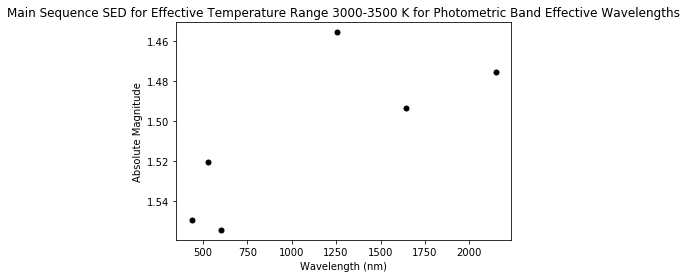

*****Effective Temperature 3500-4000 K*****
The number of main sequence stars in the effective temperature range 3500-4000 K is:  13
The mean temperature in this effective temperature range is:  3800.0
The minimum effective temperature of a main sequence star in this range is:  3580
The maximum effective temperature of a main sequence star in this range is:  4000
The standard deviation of the effective temperatures of main sequence stars in this range is:  114.219761189


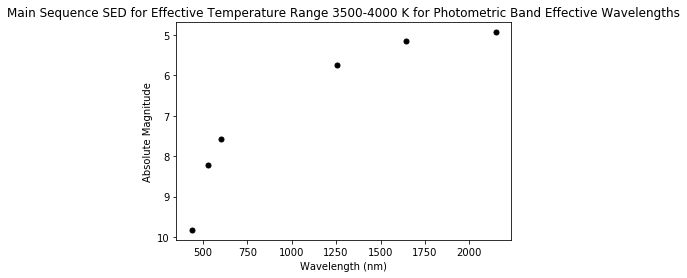

*****Effective Temperature 4000-4500 K*****
The number of main sequence stars in the effective temperature range 4000-4500 K is:  89
The mean temperature in this effective temperature range is:  4268.20224719
The minimum effective temperature of a main sequence star in this range is:  4000
The maximum effective temperature of a main sequence star in this range is:  4420
The standard deviation of the effective temperatures of main sequence stars in this range is:  143.092347001


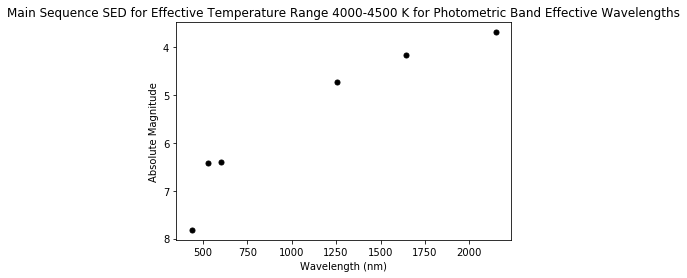

*****Effective Temperature 4500-5000 K*****
The number of main sequence stars in the effective temperature range 4500-5000 K is:  295
The mean temperature in this effective temperature range is:  4781.52542373
The minimum effective temperature of a main sequence star in this range is:  4590
The maximum effective temperature of a main sequence star in this range is:  4900
The standard deviation of the effective temperatures of main sequence stars in this range is:  113.770711422


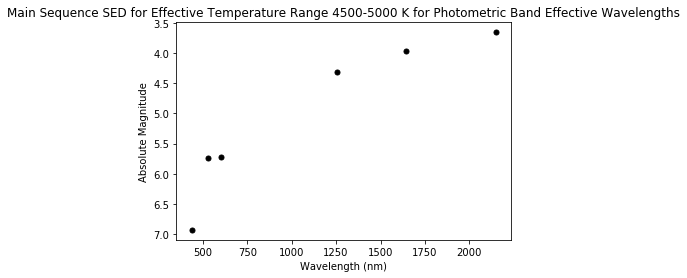

*****Effective Temperature 5000-5500 K*****
The number of main sequence stars in the effective temperature range 5000-5500 K is:  452
The mean temperature in this effective temperature range is:  5191.28318584
The minimum effective temperature of a main sequence star in this range is:  5080
The maximum effective temperature of a main sequence star in this range is:  5450
The standard deviation of the effective temperatures of main sequence stars in this range is:  81.8002065283


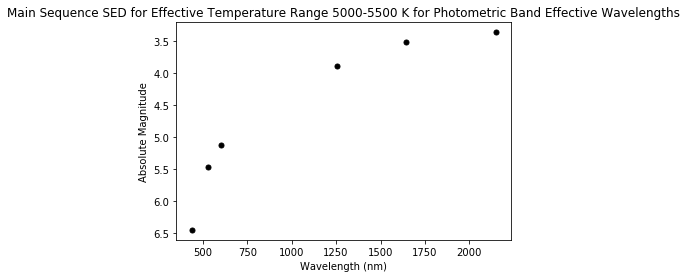

*****Effective Temperature 5500-6000 K*****
The number of main sequence stars in the effective temperature range 5500-6000 K is:  4522
The mean temperature in this effective temperature range is:  5788.25077399
The minimum effective temperature of a main sequence star in this range is:  5570
The maximum effective temperature of a main sequence star in this range is:  5860
The standard deviation of the effective temperatures of main sequence stars in this range is:  96.304406006


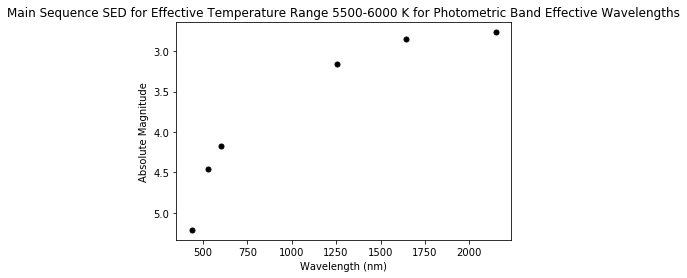

*****Effective Temperature 6000-6500 K*****
The number of main sequence stars in the effective temperature range 6000-6500 K is:  8401
The mean temperature in this effective temperature range is:  6316.11474824
The minimum effective temperature of a main sequence star in this range is:  6030
The maximum effective temperature of a main sequence star in this range is:  6470
The standard deviation of the effective temperatures of main sequence stars in this range is:  174.840272774


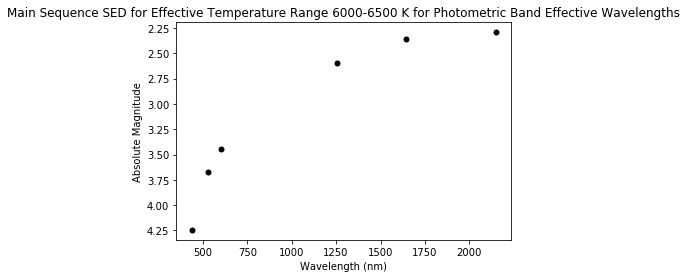

*****Effective Temperature 6500-7000 K*****
The number of main sequence stars in the effective temperature range 6500-7000 K is:  3059
The mean temperature in this effective temperature range is:  6889.92808107
The minimum effective temperature of a main sequence star in this range is:  6870
The maximum effective temperature of a main sequence star in this range is:  6890
The standard deviation of the effective temperatures of main sequence stars in this range is:  1.19716591286


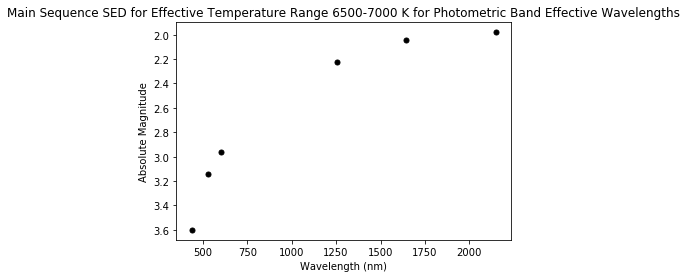

*****Effective Temperature 7000-7500 K*****
The number of main sequence stars in the effective temperature range 7000-7500 K is:  897
The mean temperature in this effective temperature range is:  7201.1148272
The minimum effective temperature of a main sequence star in this range is:  7150
The maximum effective temperature of a main sequence star in this range is:  7450
The standard deviation of the effective temperatures of main sequence stars in this range is:  19.0019999182


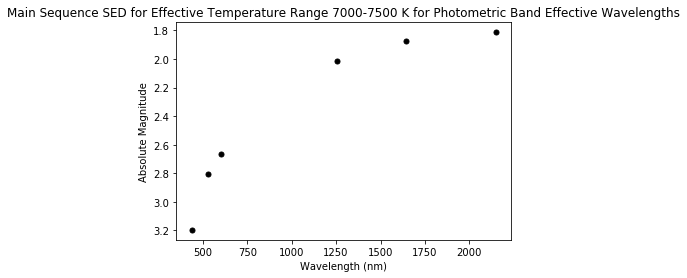

*****Effective Temperature 7500-8000 K*****
The number of main sequence stars in the effective temperature range 7500-8000 K is:  627
The mean temperature in this effective temperature range is:  7847.76714514
The minimum effective temperature of a main sequence star in this range is:  7650
The maximum effective temperature of a main sequence star in this range is:  7850
The standard deviation of the effective temperatures of main sequence stars in this range is:  21.0139318558


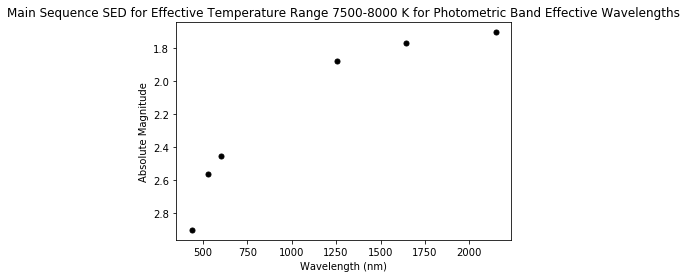

*****Effective Temperature 8000-8500 K*****
The number of main sequence stars in the effective temperature range 8000-8500 K is:  194
The mean temperature in this effective temperature range is:  8194.32989691
The minimum effective temperature of a main sequence star in this range is:  8100
The maximum effective temperature of a main sequence star in this range is:  8200
The standard deviation of the effective temperatures of main sequence stars in this range is:  23.1270456435


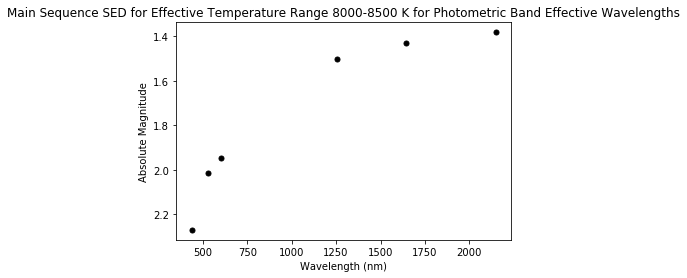

*****Effective Temperature 8500-9000 K*****
The number of main sequence stars in the effective temperature range 8500-9000 K is:  551
The mean temperature in this effective temperature range is:  8819.50998185
The minimum effective temperature of a main sequence star in this range is:  8600
The maximum effective temperature of a main sequence star in this range is:  9000
The standard deviation of the effective temperatures of main sequence stars in this range is:  128.63775794


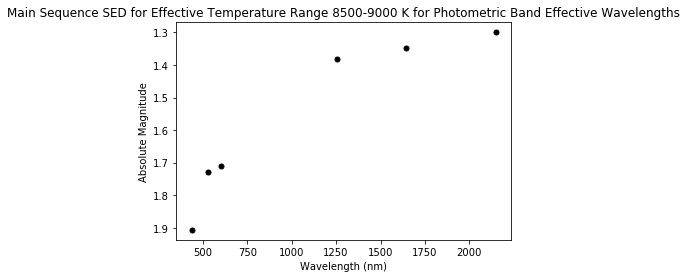

*****Effective Temperature 9000-9500 K*****
The number of main sequence stars in the effective temperature range 9000-9500 K is:  274
The mean temperature in this effective temperature range is:  9224.19708029
The minimum effective temperature of a main sequence star in this range is:  9000
The maximum effective temperature of a main sequence star in this range is:  9480
The standard deviation of the effective temperatures of main sequence stars in this range is:  41.7007657015


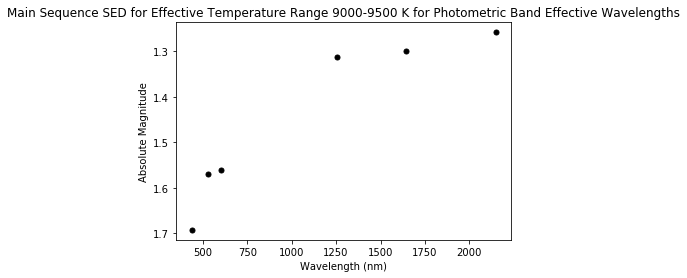

*****Effective Temperature 9500-10000 K*****
The number of main sequence stars in the effective temperature range 9500-10000 K is:  346
The mean temperature in this effective temperature range is:  9520.0
The minimum effective temperature of a main sequence star in this range is:  9520
The maximum effective temperature of a main sequence star in this range is:  9520
The standard deviation of the effective temperatures of main sequence stars in this range is:  0.0


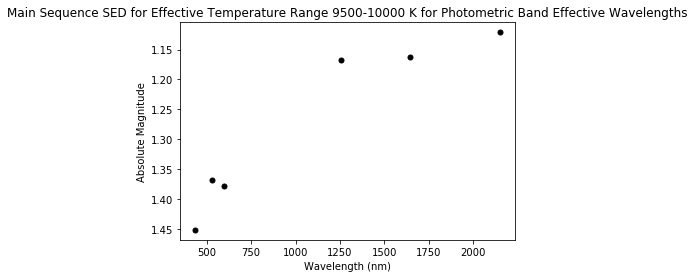

*****Effective Temperature 10000-10500 K*****
The number of main sequence stars in the effective temperature range 10000-10500 K is:  178
The mean temperature in this effective temperature range is:  10500.0
The minimum effective temperature of a main sequence star in this range is:  10500
The maximum effective temperature of a main sequence star in this range is:  10500
The standard deviation of the effective temperatures of main sequence stars in this range is:  0.0


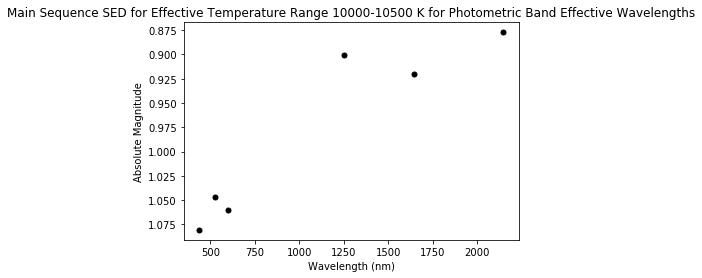

*****Effective Temperature 10500-11000 K*****
The number of main sequence stars in the effective temperature range 10500-11000 K is:  181
The mean temperature in this effective temperature range is:  10508.2872928
The minimum effective temperature of a main sequence star in this range is:  10500
The maximum effective temperature of a main sequence star in this range is:  11000
The standard deviation of the effective temperatures of main sequence stars in this range is:  63.8354696591


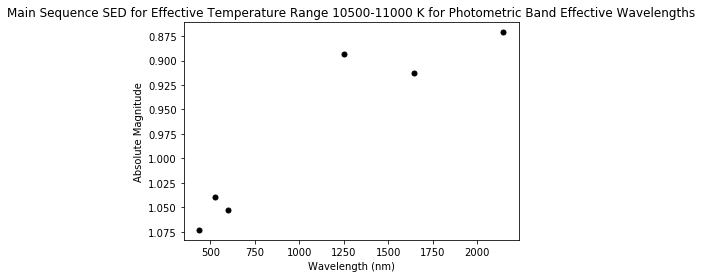

*****Effective Temperature 11000-11500 K*****
The number of main sequence stars in the effective temperature range 11000-11500 K is:  3
The mean temperature in this effective temperature range is:  11000.0
The minimum effective temperature of a main sequence star in this range is:  11000
The maximum effective temperature of a main sequence star in this range is:  11000
The standard deviation of the effective temperatures of main sequence stars in this range is:  0.0


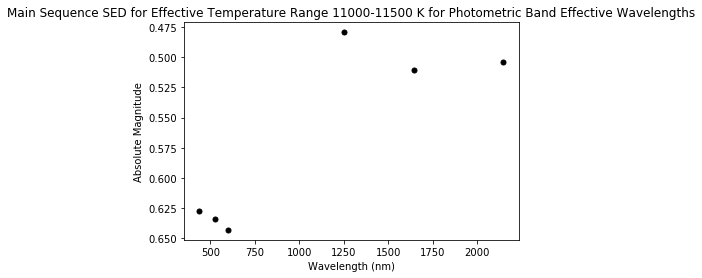

*****Effective Temperature 11500-12000 K*****
The number of main sequence stars in the effective temperature range 11500-12000 K is:  40
The mean temperature in this effective temperature range is:  11900.0
The minimum effective temperature of a main sequence star in this range is:  11900
The maximum effective temperature of a main sequence star in this range is:  11900
The standard deviation of the effective temperatures of main sequence stars in this range is:  0.0


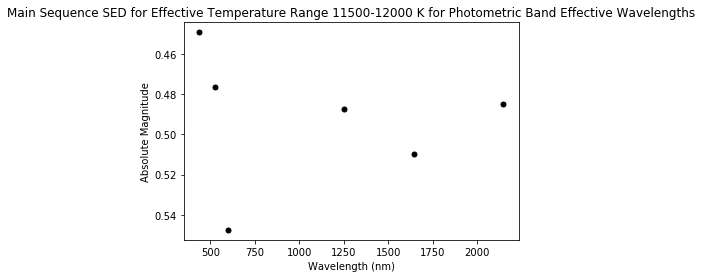

*****Effective Temperature 12000-12500 K*****
The number of main sequence stars in the effective temperature range 12000-12500 K is:  1
The mean temperature in this effective temperature range is:  12400.0
The minimum effective temperature of a main sequence star in this range is:  12400
The maximum effective temperature of a main sequence star in this range is:  12400
The standard deviation of the effective temperatures of main sequence stars in this range is:  0.0


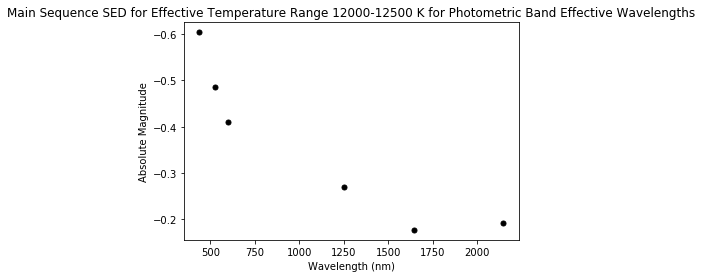

*****Effective Temperature 12500-13000 K*****
The number of main sequence stars in the effective temperature range 12500-13000 K is:  13
The mean temperature in this effective temperature range is:  13000.0
The minimum effective temperature of a main sequence star in this range is:  13000
The maximum effective temperature of a main sequence star in this range is:  13000
The standard deviation of the effective temperatures of main sequence stars in this range is:  0.0


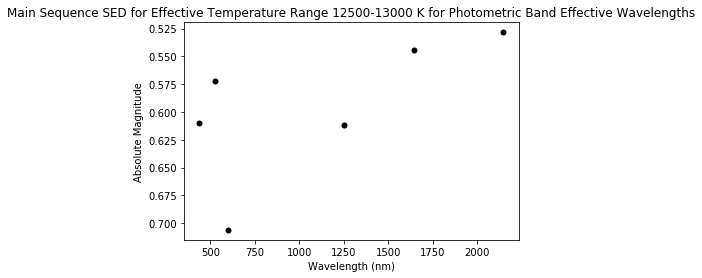

*****Effective Temperature 13000-13500 K*****
The number of main sequence stars in the effective temperature range 13000-13500 K is:  13
The mean temperature in this effective temperature range is:  13000.0
The minimum effective temperature of a main sequence star in this range is:  13000
The maximum effective temperature of a main sequence star in this range is:  13000
The standard deviation of the effective temperatures of main sequence stars in this range is:  0.0


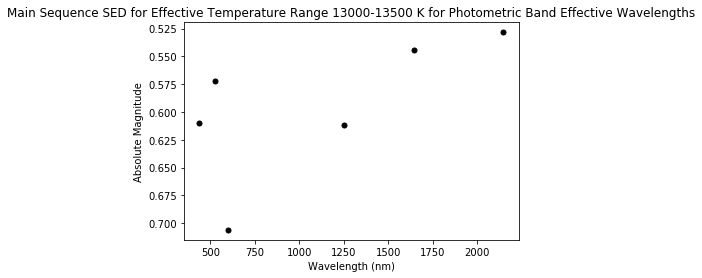

*****Effective Temperature 13500-14000 K*****
The number of main sequence stars in the effective temperature range 13500-14000 K is:  4
The mean temperature in this effective temperature range is:  14000.0
The minimum effective temperature of a main sequence star in this range is:  14000
The maximum effective temperature of a main sequence star in this range is:  14000
The standard deviation of the effective temperatures of main sequence stars in this range is:  0.0


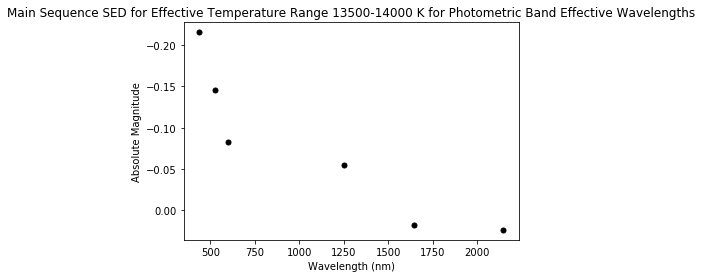

*****Effective Temperature 14000-14500 K*****
The number of main sequence stars in the effective temperature range 14000-14500 K is:  4
The mean temperature in this effective temperature range is:  14000.0
The minimum effective temperature of a main sequence star in this range is:  14000
The maximum effective temperature of a main sequence star in this range is:  14000
The standard deviation of the effective temperatures of main sequence stars in this range is:  0.0


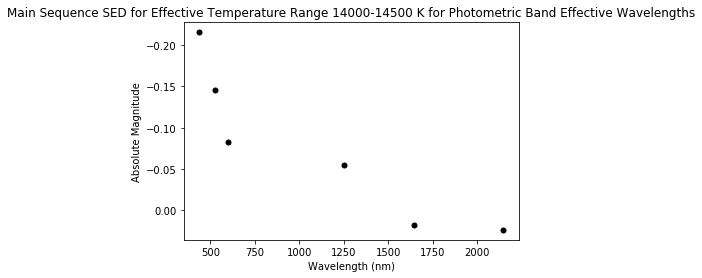

In [8]:
LowTemperatures=[3000,3500,4000,4500,5000,5500,6000,6500,7000,7500,8000,8500,9000,9500,10000,10500,11000,11500,12000,12500,13000,13500,14000]
AverageTemperatures=[]
MinimumTemperatures=[]
MaximumTemperatures=[]
TemperatureStandardDeviations=[]
AbsFilterMagnitudesMatrix=numpy.zeros((len(LowTemperatures),6))
for i in LowTemperatures:
    print('*****Effective Temperature %g-%g K*****'%(i,i+500))
    TeffMask=numpy.ma.masked_outside(MainSequenceTeff,i,i+500)
    Teffplt=numpy.ma.compressed(TeffMask)
    n=TeffMask.count()
    print('The number of main sequence stars in the effective temperature range %g-%g K is: '%(i,i+500),n)
    MeanTemperature=sum(Teffplt)/n
    print('The mean temperature in this effective temperature range is: ',MeanTemperature)
    AverageTemperatures.append(MeanTemperature)
    MinimumTemperature=min(Teffplt)
    print('The minimum effective temperature of a main sequence star in this range is: ',MinimumTemperature)
    MinimumTemperatures.append(MinimumTemperature)
    MaximumTemperature=max(Teffplt)
    print('The maximum effective temperature of a main sequence star in this range is: ',MaximumTemperature)
    MaximumTemperatures.append(MaximumTemperature)
    TemperatureStandardDeviation=numpy.std(TeffMask)
    print('The standard deviation of the effective temperatures of main sequence stars in this range is: ',TemperatureStandardDeviation)
    TemperatureStandardDeviations.append(TemperatureStandardDeviation)    
    JMask=numpy.ma.array(MainSequenceJabsmag,mask=TeffMask.mask)
    Jplt=numpy.ma.compressed(JMask)
    Jplt=Jplt[~numpy.isnan(Jplt)]
    MeanMainSequenceJplt=numpy.average(Jplt)
    HMask=numpy.ma.array(MainSequenceHabsmag,mask=TeffMask.mask)
    Hplt=numpy.ma.compressed(HMask)
    Hplt=Hplt[~numpy.isnan(Hplt)]
    MeanMainSequenceHplt=numpy.average(Hplt)
    KMask=numpy.ma.array(MainSequenceKabsmag,mask=TeffMask.mask)
    Kplt=numpy.ma.compressed(KMask)
    Kplt=Kplt[~numpy.isnan(Kplt)]
    MeanMainSequenceKplt=numpy.average(Kplt)
    GMask=numpy.ma.array(MainSequenceGabsmag,mask=TeffMask.mask)
    Gplt=numpy.ma.compressed(GMask)
    Gplt=Gplt[~numpy.isnan(Gplt)]
    MeanMainSequenceGplt=numpy.average(Gplt)
    VMask=numpy.ma.array(MainSequenceVabsmag,mask=TeffMask.mask)
    Vplt=numpy.ma.compressed(VMask)
    Vplt=Vplt[~numpy.isnan(Vplt)]
    MeanMainSequenceVplt=numpy.average(Vplt)
    BMask=numpy.ma.array(MainSequenceBabsmag,mask=TeffMask.mask)
    Bplt=numpy.ma.compressed(BMask)
    Bplt=Bplt[~numpy.isnan(Bplt)]
    MeanMainSequenceBplt=numpy.average(Bplt)
    FilterAbsMag=[MeanMainSequenceBplt,MeanMainSequenceVplt,MeanMainSequenceGplt,MeanMainSequenceJplt,MeanMainSequenceHplt,MeanMainSequenceKplt] 
    RowNumber=(i-3000)/500
    j=int(RowNumber)
    AbsFilterMagnitudesMatrix[j, : ]=FilterAbsMag
    plt.xlabel('Wavelength (nm)')
    plt.ylabel('Absolute Magnitude')
    plt.title('Main Sequence SED for Effective Temperature Range %g-%g K for Photometric Band Effective Wavelengths'%(i,i+500))
    plt.plot(EffWavelengths,FilterAbsMag,'ko',ms=5)
    plt.gca().invert_yaxis()
    plt.show()

/astromake/opt/python/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: UserWarning: Warning: converting a masked element to nan.
  # This is added back by InteractiveShellApp.init_path()
/astromake/opt/python/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
/astromake/opt/python/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:21: UserWarning: Warning: converting a masked element to nan.
/astromake/opt/python/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:26: UserWarning: Warning: converting a masked element to nan.
/astromake/opt/python/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:31: UserWarning: Warning: converting a masked element to nan.
/astromake/opt/python/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:36: UserWarning: Warning: converting a masked element to nan.


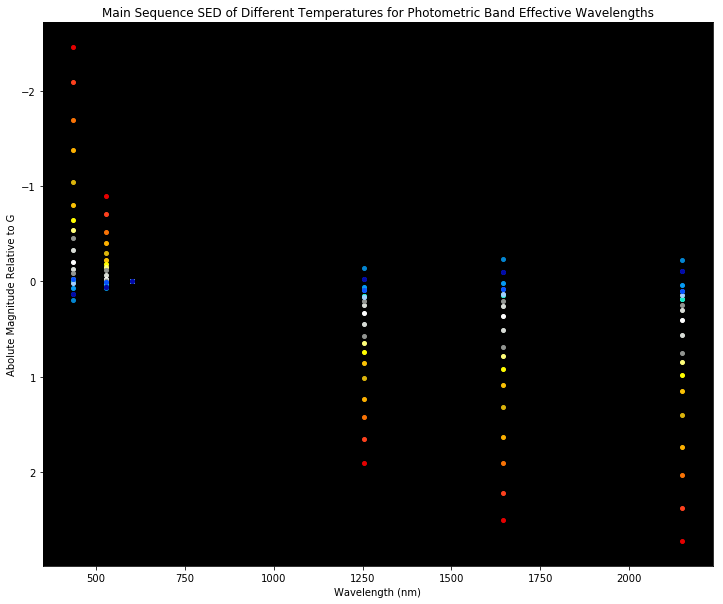

In [9]:
LowTemperatures=[3500,4000,4500,5000,5500,6000,6500,7000,7500,8000,8500,9000,9500,10000,10500,11000,11500,12000,12500,13000,13500,14000]
AverageTemperatures=[]
MinimumTemperatures=[]
MaximumTemperatures=[]
TemperatureStandardDeviations=[]
for i in LowTemperatures:
    TeffMask=numpy.ma.masked_outside(MainSequenceTeff,i,i+500)
    Teffplt=numpy.ma.compressed(TeffMask)
    n=TeffMask.count()
    MeanTemperature=sum(Teffplt)/n
    MainSequenceG_Jabsmag=numpy.subtract(MainSequenceGabsmag,MainSequenceJabsmag)
    G_JMask=numpy.ma.array(MainSequenceG_Jabsmag,mask=TeffMask.mask)
    G_Jplt=numpy.ma.compressed(G_JMask)
    G_Jplt=G_Jplt[~numpy.isnan(G_Jplt)]
    MeanMainSequenceG_Jplt=numpy.average(G_Jplt)
    MainSequenceG_Habsmag=numpy.subtract(MainSequenceGabsmag,MainSequenceHabsmag)
    G_HMask=numpy.ma.array(MainSequenceG_Habsmag,mask=TeffMask.mask)
    G_Hplt=numpy.ma.compressed(G_HMask)
    G_Hplt=G_Hplt[~numpy.isnan(G_Hplt)]
    MeanMainSequenceG_Hplt=numpy.average(G_Hplt)
    MainSequenceG_Kabsmag=numpy.subtract(MainSequenceGabsmag,MainSequenceKabsmag)
    G_KMask=numpy.ma.array(MainSequenceG_Kabsmag,mask=TeffMask.mask)
    G_Kplt=numpy.ma.compressed(G_KMask)
    G_Kplt=G_Kplt[~numpy.isnan(G_Kplt)]
    MeanMainSequenceG_Kplt=numpy.average(G_Kplt)
    MainSequenceG_Gabsmag=numpy.subtract(MainSequenceGabsmag,MainSequenceGabsmag)
    G_GMask=numpy.ma.array(MainSequenceG_Gabsmag,mask=TeffMask.mask)
    G_Gplt=numpy.ma.compressed(G_GMask)
    G_Gplt=G_Gplt[~numpy.isnan(G_Gplt)]
    MeanMainSequenceG_Gplt=numpy.average(G_Gplt)
    MainSequenceG_Vabsmag=numpy.subtract(MainSequenceGabsmag,MainSequenceVabsmag)
    G_VMask=numpy.ma.array(MainSequenceG_Vabsmag,mask=TeffMask.mask)
    G_Vplt=numpy.ma.compressed(G_VMask)
    G_Vplt=G_Vplt[~numpy.isnan(G_Vplt)]
    MeanMainSequenceG_Vplt=numpy.average(G_Vplt)
    MainSequenceG_Babsmag=numpy.subtract(MainSequenceGabsmag,MainSequenceBabsmag)
    G_BMask=numpy.ma.array(MainSequenceG_Babsmag,mask=TeffMask.mask)
    G_Bplt=numpy.ma.compressed(G_BMask)
    G_Bplt=G_Bplt[~numpy.isnan(G_Bplt)]
    MeanMainSequenceG_Bplt=numpy.average(G_Bplt)
    GSubtractionAbsMag=[MeanMainSequenceG_Bplt,MeanMainSequenceG_Vplt,MeanMainSequenceG_Gplt,MeanMainSequenceG_Jplt,MeanMainSequenceG_Hplt,MeanMainSequenceG_Kplt]
    plt.rcParams['axes.facecolor']='black'
    plt.rcParams['figure.figsize']=12,10
    #if i==3000:
        #plt.plot(EffWavelengths,FilterAbsMag,'xkcd:blood',ms=5)    
    if i==3500:
        plt.plot(EffWavelengths,GSubtractionAbsMag,color='xkcd:red',linestyle='None',marker='.',markersize=8)
    elif i==4000:
        plt.plot(EffWavelengths,GSubtractionAbsMag,color='xkcd:orange red',linestyle='None',marker='.',markersize=8)
    elif i==4500:
        plt.plot(EffWavelengths,GSubtractionAbsMag,color='xkcd:orange',linestyle='None',marker='.',markersize=8)
    elif i==5000:
        plt.plot(EffWavelengths,GSubtractionAbsMag,color='xkcd:yellow orange',linestyle='None',marker='.',markersize=8)
    elif i==5500:
        plt.plot(EffWavelengths,GSubtractionAbsMag,color='xkcd:gold',linestyle='None',marker='.',markersize=8)
    elif i==6000:
        plt.plot(EffWavelengths,GSubtractionAbsMag,color='xkcd:goldenrod',linestyle='None',marker='.',markersize=8)
    elif i==6500:
        plt.plot(EffWavelengths,GSubtractionAbsMag,color='xkcd:bright yellow',linestyle='None',marker='.',markersize=8)
    elif i==7000:
        plt.plot(EffWavelengths,GSubtractionAbsMag,color='xkcd:light yellow',linestyle='None',marker='.',markersize=8)
    elif i==7500:
        plt.plot(EffWavelengths,GSubtractionAbsMag,color='xkcd:grey',linestyle='None',marker='.',markersize=8)
    elif i==8000:
        plt.plot(EffWavelengths,GSubtractionAbsMag,color='xkcd:light grey',linestyle='None',marker='.',markersize=8)
    elif i==8500:
        plt.plot(EffWavelengths,GSubtractionAbsMag,color='xkcd:white',linestyle='None',marker='.',markersize=8)
    elif i==9000:
        plt.plot(EffWavelengths,GSubtractionAbsMag,color='xkcd:light grey',linestyle='None',marker='.',markersize=8)
    elif i==9500:
        plt.plot(EffWavelengths,GSubtractionAbsMag,color='xkcd:grey',linestyle='None',marker='.',markersize=8)
    elif i==10000:
        plt.plot(EffWavelengths,GSubtractionAbsMag,color='xkcd:pale cyan',linestyle='None',marker='.',markersize=8)
    elif i==10500:
        plt.plot(EffWavelengths,GSubtractionAbsMag,color='xkcd:aqua',linestyle='None',marker='.',markersize=8)
    elif i==11000:
        plt.plot(EffWavelengths,GSubtractionAbsMag,color='xkcd:baby blue',linestyle='None',marker='.',markersize=8)
    elif i==11500:
        plt.plot(EffWavelengths,GSubtractionAbsMag,color='xkcd:azure',linestyle='None',marker='.',markersize=8)
    elif i==12000:
        plt.plot(EffWavelengths,GSubtractionAbsMag,color='xkcd:cerulean',linestyle='None',marker='.',markersize=8)
    elif i==12500:
        plt.plot(EffWavelengths,GSubtractionAbsMag,color='xkcd:dusty blue',linestyle='None',marker='.',markersize=8)
    elif i==13000:
        plt.plot(EffWavelengths,GSubtractionAbsMag,color='xkcd:electric blue',linestyle='None',marker='.',markersize=8)
    elif i==13500:
        plt.plot(EffWavelengths,GSubtractionAbsMag,color='xkcd:blue',linestyle='None',marker='.',markersize=8)
    elif i==14000:
        plt.plot(EffWavelengths,GSubtractionAbsMag,color='xkcd:cobalt blue',linestyle='None',marker='.',markersize=8)
plt.xlabel('Wavelength (nm)')
plt.ylabel('Abolute Magnitude Relative to G')
plt.title('Main Sequence SED of Different Temperatures for Photometric Band Effective Wavelengths')
plt.gca().invert_yaxis()
plt.show()

In [51]:
Uncertainty=0.1
BmV=numpy.subtract(MainSequenceBabsmag,MainSequenceVabsmag)
BmG=numpy.subtract(MainSequenceBabsmag,MainSequenceGabsmag)
VmG=numpy.subtract(MainSequenceVabsmag,MainSequenceGabsmag)
JmG=numpy.subtract(MainSequenceJabsmag,MainSequenceGabsmag)
HmG=numpy.subtract(MainSequenceHabsmag,MainSequenceGabsmag)
KmG=numpy.subtract(MainSequenceKabsmag,MainSequenceGabsmag)
#for i in range(0,len(BmG)):
    #if TranslatedLuminosityClass[i]<4.9 or TranslatedLuminosityClass[i]>5.05:
        #BmG.mask[i] = True
        #VmG.mask[i] = True
        #JmG.mask[i] = True
        #HmG.mask[i] = True
        #KmG.mask[i] = True
temps=[6000]
Tsed=numpy.zeros((len(temps),5))
Tsed_std=numpy.zeros((len(temps),5))
Tsed_cnt=numpy.zeros((len(temps),5))
Temp_SED=numpy.zeros(len(temps))
#for i in range(0,len(temps)-1):
    #tlo=temps[i]
    #thi=temps[i]+500
    #Temp_SED[i]=(temps[i]+temps[i]+500)/2.0
    #TeffMask=numpy.ma.masked_outside(MainSequenceTeff,tlo,thi)
    #BmGMask=numpy.ma.array(BmG,mask=TeffMask.mask)
    #Tsed[i,0]=numpy.mean(BmGMask)
    #Tsed_std[i,0]=numpy.std(BmGMask)
    #Tsed_cnt[i,0]=TeffMask.count()
    #VmGMask=numpy.ma.array(VmG,mask=TeffMask.mask)
    #Tsed[i,1]=numpy.mean(VmGMask)
    #Tsed_std[i,1]=numpy.std(VmGMask)
    #Tsed_cnt[i,1]=TeffMask.count()
    #JmGMask=numpy.ma.array(JmG,mask=TeffMask.mask)
    #Tsed[i,2]=numpy.mean(JmGMask)
    #Tsed_std[i,2]=numpy.std(JmGMask)
    #Tsed_cnt[i,2]=TeffMask.count()
    #HmGMask=numpy.ma.array(HmG,mask=TeffMask.mask)
    #Tsed[i,3]=numpy.mean(HmGMask)
    #Tsed_std[i,3]=numpy.std(HmGMask)
    #Tsed_cnt[i,3]=TeffMask.count()
    #KmGMask=numpy.ma.array(KmG,mask=TeffMask.mask)
    #Tsed[i,4]=numpy.mean(KmGMask)
    #Tsed_std[i,4]=numpy.std(KmGMask)
    #Tsed_cnt[i,4]=TeffMask.count()   
tlo=6000
thi=6500
Temp_SED=6250
TeffMask=numpy.ma.masked_outside(MainSequenceTeff,6000,6500)
BmGMask=numpy.ma.array(BmG,mask=TeffMask.mask)
Tsed[0,0]=numpy.mean(BmGMask)
Tsed_std[0,0]=numpy.std(BmGMask)
Tsed_cnt[0,0]=TeffMask.count()
VmGMask=numpy.ma.array(VmG,mask=TeffMask.mask)
Tsed[0,1]=numpy.mean(VmGMask)
Tsed_std[0,1]=numpy.std(VmGMask)
Tsed_cnt[0,1]=TeffMask.count()
JmGMask=numpy.ma.array(JmG,mask=TeffMask.mask)
Tsed[0,2]=numpy.mean(JmGMask)
Tsed_std[0,2]=numpy.std(JmGMask)
Tsed_cnt[0,2]=TeffMask.count()
HmGMask=numpy.ma.array(HmG,mask=TeffMask.mask)
Tsed[0,3]=numpy.mean(HmGMask)
Tsed_std[0,3]=numpy.std(HmGMask)
Tsed_cnt[0,3]=TeffMask.count()
KmGMask=numpy.ma.array(KmG,mask=TeffMask.mask)
Tsed[0,4]=numpy.mean(KmGMask)
Tsed_std[0,4]=numpy.std(KmGMask)
Tsed_cnt[0,4]=TeffMask.count()
count=0
Temp_est=numpy.array([])
Teff_est=numpy.array([])
Test_SED=numpy.ma.masked_array([0.0]*5,mask=False)
for i in range(0,len(Source)):
    if Jmag.mask[i]==False:
        if Hmag.mask[i]==False:
            if Kmag.mask[i]==False:
                if TranslatedLuminosityClass[i]>4.9 and TranslatedLuminosityClass[i]<5.05:
                    ChiSquared=numpy.zeros(1)
                    Test_SED[0]=numpy.ma.masked_array(Babsmag[i]-Gabsmag[i])
                    Test_SED[1]=numpy.ma.masked_array(Vabsmag[i]-Gabsmag[i])
                    Test_SED[2]=numpy.ma.masked_array(Jabsmag[i]-Gabsmag[i])
                    Test_SED[3]=numpy.ma.masked_array(Habsmag[i]-Gabsmag[i])
                    Test_SED[4]=numpy.ma.masked_array(Kabsmag[i]-Gabsmag[i])
                    for j in range(0,1):
                        Template=Tsed[j, : ]
                        for k in range(0,4):
                            if Test_SED.mask[k]==False:
                                ChiSquared[j]=ChiSquared[j]+(((Test_SED[k]-Template[k])*(Test_SED[k]-Template[k]))/(0.1*0.1*5))
                    MinimumChiSquared=numpy.where(ChiSquared==ChiSquared.min())
                    j=MinimumChiSquared[0]
                    Temp_est=numpy.append(Temp_est,6250)
                    Teff_est=numpy.append(Teff_est,Teff[i])
                    print(i,ChiSquared,Teff[i])
    count=count+1
            
print(Temp_est)




#60006500TeffMask=numpy.ma.masked_outside(MainSequenceTeff,6000,6500)
#60006500Teffplt=numpy.ma.compressed(60006500TeffMask)
#60006500Teffplt=60006500Teffplt[~numpy.isnan(60006500Teffplt)]
#n=60006500TeffMask.count()

#f?
#60006500TinfArray=60006500Tinf*numpy.ones(len(60006500Teffplt))

#HipparcosIdentifierMask=numpy.ma.array(HipparcosIdentifier,mask=60006500TeffMask.mask)
#HipparcosIdentifierplt=numpy.ma.compressed(HipparcosIdentifierMask)
#HipparcosIdentifierplt=HipparcosIdentifierplt[~numpy.isnan(HipparcosIdentifierplt)]
#N=HipparcosIdentifierMas.count()
#OutlierHipparcosIdentifiers=[]
#TemperatureDifference=numpy.subtract(60006500Teffplt,60006500TinfArray)
#AbsoluteTemperatureDifference=abs(TemperatureDifference)
#TemperatureDifferenceStandardDeviation=numpy.std(TemperatureDifference)
#for i in range(0,len(AbsoluteTemperatureDifference)):
    #if AbsoluteTemperatureDifference[i]>=3*TemperatureDifferenceStandardDeviation:
        #print('The star with absolute temperature difference Teff-Tinf=%g has Hipparcos identifier number %g.',%(AbsoluteTemperatureDifference[i],HipparcosIdentifierplt[i]))
        #OutlierHipparcosIdentifiers.append(HipparcosIdentifierplt[i])
#print('All of the Hipparcos identifier numbers for the stars with absolute temperature differences greater than or equal to 3 sigmas are:')
#print(OutlierHipparcosIdentifiers)




#Do temperature range of 6,000-6,500 K just to get it working and show example


#LowTemperatures=[3500,4000,4500,5000,5500,6000,6500,7000,7500,8000,8500,9000,9500,10000,10500,11000,11500,12000,12500,13000,13500,14000]
#s=(len(LowTemperatures),5)
#TemperatureSED=numpy.zeros(s)


#60006500Tinf=numpy.array([])


#print(len(Temp_est))
#Tdiff = Temp_est - Teff_est
#plt.hist(Tdiff,bins=15)
#plt.show()
#print("Mean T-fitted - Teff: ", np.mean(Tdiff))
#print("Standard Deviation:   ", np.std(Tdiff))    


#print(n)
#print(N)
#print(len(60006500TinfArray))

/astromake/opt/python/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Warning: converting a masked element to nan.
  
/astromake/opt/python/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Warning: converting a masked element to nan.
  This is separate from the ipykernel package so we can avoid doing imports until
/astromake/opt/python/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Warning: converting a masked element to nan.
  after removing the cwd from sys.path.
/astromake/opt/python/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Warning: converting a masked element to nan.
  """
/astromake/opt/python/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Warning: converting a masked element to nan.
  
/astromake/opt/python/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: Warning: converting a masked element to nan.
  import

2 [ nan] 9520
9 [ nan] 6440
14 [ nan] 6890
20 [ nan] 5250
23 [ nan] 6440
26 [ nan] 6440
28 [ nan] 5860
29 [ nan] 6440
30 [ nan] 6890
31 [ nan] 9230
33 [ nan] 6440
37 [ nan] 8970
39 [ nan] 6440
41 [ nan] 9520
43 [ nan] 5770
44 [ nan] 5860
49 [ nan] 5770
50 [ nan] 9230
51 [ nan] 6890
54 [ nan] 6890
55 [ nan] 6890
57 [ nan] 5770
58 [ nan] 5860
61 [ nan] 6890
63 [ nan] 5860
68 [ nan] 6890
70 [ nan] 6440
71 [ nan] 6440
73 [ nan] 6440
75 [ nan] 6440
79 [ nan] 7850
80 [ nan] 10500
82 [ nan] 5770
83 [ nan] 5860
86 [ nan] 6200
88 [ nan] 8200
91 [ nan] 5770
92 [ nan] 8970
95 [ nan] 7200
97 [ nan] 8970
98 [ nan] 9520
99 [ nan] 6440
101 [ nan] 6030
104 [ nan] 6890
108 [ nan] 6890
109 [ nan] 6890
111 [ nan] 5860
112 [ nan] 5570
115 [ nan] 5860
117 [ nan] 6440
119 [ nan] 6890
120 [ nan] 5770
121 [ nan] 5860
123 [ nan] 6030
129 [ nan] 5860
131 [ nan] 5770
133 [ nan] 5860
134 [ nan] 5860
136 [ nan] 9520
137 [ nan] 5860
139 [ nan] 6440
141 [ nan] 6890
147 [ nan] 7200
149 [ nan] 9230
156 [ nan] 6440
157

1364 [ nan] 5860
1366 [ nan] 5860
1367 [ nan] 6440
1368 [ nan] 6890
1370 [ nan] 6440
1371 [ nan] 5250
1373 [ nan] 6440
1374 [ nan] 6440
1376 [ nan] 5570
1380 [ nan] 5250
1381 [ nan] 8200
1384 [ nan] 6440
1391 [ nan] 6030
1394 [ nan] 7200
1396 [ nan] 6440
1399 [ nan] 8720
1401 [ nan] 7200
1404 [ nan] 5860
1406 [ nan] 5570
1408 [ nan] 6200
1409 [ nan] 9230
1410 [ nan] 5770
1412 [ nan] 6890
1414 [ nan] 6440
1415 [ nan] 8200
1423 [ nan] 6440
1425 [ nan] 5570
1429 [ nan] 6200
1432 [ nan] 7850
1436 [ nan] 6440
1437 [ nan] 6440
1441 [ nan] 9520
1442 [ nan] 11000
1443 [ nan] 5860
1445 [ nan] 6440
1454 [ nan] 6890
1457 [ nan] 6200
1462 [ nan] 6200
1464 [ nan] 6030
1467 [ nan] 6440
1468 [ nan] 6440
1470 [ nan] 5570
1472 [ nan] 6440
1475 [ nan] 6200
1479 [ nan] 6440
1489 [ nan] 6890
1490 [ nan] 7200
1496 [ nan] 5860
1500 [ nan] 7200
1502 [ nan] 6200
1504 [ nan] 6890
1509 [ nan] 6030
1512 [ nan] 6890
1516 [ nan] 8720
1521 [ nan] 6440
1522 [ nan] 6890
1530 [ nan] 6890
1532 [ nan] 13000
1536 [ nan] 

2639 [ nan] 5770
2641 [ nan] 6440
2643 [ nan] 4900
2644 [ nan] 6890
2648 [ nan] 7200
2651 [ nan] 8970
2653 [ nan] 6440
2655 [ nan] 6890
2656 [ nan] 6890
2660 [ nan] 6030
2664 [ nan] 4350
2666 [ nan] 9230
2671 [ nan] 5860
2673 [ nan] 6200
2677 [ nan] 5860
2682 [ nan] 7200
2685 [ nan] 6440
2689 [ nan] 6030
2691 [ nan] 6200
2692 [ nan] 6440
2694 [ nan] 6200
2697 [ nan] 6200
2698 [ nan] 6030
2699 [ nan] 5860
2704 [ nan] 6030
2705 [ nan] 5570
2709 [ nan] 5860
2710 [ nan] 4900
2712 [ nan] 6890
2716 [ nan] 5860
2718 [ nan] 7850
2719 [ nan] 6440
2720 [ nan] 6440
2721 [ nan] 6440
2722 [ nan] 5860
2724 [ nan] 5570
2740 [ nan] 6890
2742 [ nan] 5860
2743 [ nan] 7850
2746 [ nan] 7200
2750 [ nan] 6440
2751 [ nan] 5860
2754 [ nan] 5770
2755 [ nan] 6440
2756 [ nan] 5860
2757 [ nan] 5770
2758 [ nan] 5770
2762 [ nan] 6890
2765 [ nan] 6030
2767 [ nan] 6440
2768 [ nan] 7200
2770 [ nan] 6440
2771 [ nan] 7850
2772 [ nan] 5770
2773 [ nan] 11900
2775 [ nan] 6440
2777 [ nan] 6890
2782 [ nan] 8970
2790 [ nan] 1

3926 [ nan] 6030
3932 [ nan] 5860
3933 [ nan] 6200
3934 [ nan] 6440
3938 [ nan] 6890
3940 [ nan] 6890
3941 [ nan] 6200
3942 [ nan] 6030
3944 [ nan] 6030
3948 [ nan] 6030
3950 [ nan] 10500
3951 [ nan] 7850
3952 [ nan] 6440
3953 [ nan] 5860
3955 [ nan] 5860
3956 [ nan] 6440
3957 [ nan] 6030
3958 [ nan] 6890
3959 [ nan] 6440
3960 [ nan] 7200
3961 [ nan] 6440
3962 [ nan] 6890
3963 [ nan] 6440
3965 [ nan] 5770
3966 [ nan] 7200
3967 [ nan] 6890
3968 [ nan] 6440
3969 [ nan] 6030
3971 [ nan] 6440
3972 [ nan] 5770
3975 [ nan] 5860
3976 [ nan] 5860
3977 [ nan] 6030
3978 [ nan] 6440
3982 [ nan] 5860
3985 [ nan] 5860
3987 [ nan] 5860
3990 [ nan] 5770
3991 [ nan] 7850
3993 [ nan] 5770
3994 [ nan] 6890
3999 [ nan] 8720
4000 [ nan] 6440
4002 [ nan] 7200
4006 [ nan] 5860
4007 [ nan] 6890
4008 [ nan] 6890
4012 [ nan] 6030
4014 [ nan] 6030
4015 [ nan] 5860
4017 [ nan] 6440
4018 [ nan] 7200
4019 [ nan] 5860
4022 [ nan] 6890
4026 [ nan] 6030
4028 [ nan] 5860
4031 [ nan] 8720
4032 [ nan] 6890
4033 [ nan] 6

5119 [ nan] 7850
5120 [ nan] 6440
5125 [ nan] 9520
5126 [ nan] 6440
5128 [ nan] 6030
5132 [ nan] 6890
5133 [ nan] 7200
5135 [ nan] 6890
5144 [ nan] 6890
5152 [ nan] 6200
5154 [ nan] 6890
5155 [ nan] 7850
5156 [ nan] 7200
5161 [ nan] 5860
5163 [ nan] 6890
5174 [ nan] 4060
5177 [ nan] 6440
5178 [ nan] 6440
5182 [ nan] 8720
5184 [ nan] 8970
5185 [ nan] 6890
5187 [ nan] 6890
5188 [ nan] 6440
5190 [ nan] 7200
5191 [ nan] 6440
5192 [ nan] 6890
5193 [ nan] 6440
5194 [ nan] 6440
5197 [ nan] 6030
5199 [ nan] 6440
5200 [ nan] 7850
5201 [ nan] 5860
5204 [ nan] 6030
5207 [ nan] 6440
5212 [ nan] 6440
5214 [ nan] 6440
5220 [ nan] 9520
5223 [ nan] 6440
5225 [ nan] 9520
5227 [ nan] 5860
5229 [ nan] 6890
5234 [ nan] 6440
5235 [ nan] 8200
5237 [ nan] 6030
5249 [ nan] 5570
5251 [ nan] 6440
5255 [ nan] 5770
5257 [ nan] 6890
5262 [ nan] 5860
5265 [ nan] 5250
5270 [ nan] 5860
5271 [ nan] 5860
5276 [ nan] 7200
5277 [ nan] 6440
5278 [ nan] 6890
5280 [ nan] 6200
5281 [ nan] 5570
5283 [ nan] 5860
5285 [ nan] 78

6864 [ nan] 10500
6865 [ nan] 5570
6866 [ nan] 6890
6868 [ nan] 6440
6876 [ nan] 6440
6884 [ nan] 6890
6886 [ nan] 6440
6888 [ nan] 5860
6892 [ nan] 5770
6896 [ nan] 6890
6898 [ nan] 5770
6900 [ nan] 6030
6902 [ nan] 6030
6905 [ nan] 6030
6906 [ nan] 6890
6909 [ nan] 6440
6913 [ nan] 6440
6914 [ nan] 6890
6917 [ nan] 6890
6919 [ nan] 7200
6920 [ nan] 6030
6921 [ nan] 6030
6924 [ nan] 5860
6926 [ nan] 6440
6929 [ nan] 5860
6930 [ nan] 6030
6931 [ nan] 6030
6932 [ nan] 6440
6933 [ nan] 6030
6934 [ nan] 6890
6935 [ nan] 6030
6937 [ nan] 6440
6939 [ nan] 7200
6942 [ nan] 6030
6945 [ nan] 6440
6946 [ nan] 6030
6948 [ nan] 7850
6951 [ nan] 5770
6952 [ nan] 5860
6954 [ nan] 6440
6958 [ nan] 6440
6961 [ nan] 6030
6962 [ nan] 8200
6963 [ nan] 6890
6967 [ nan] 6440
6969 [ nan] 9520
6972 [ nan] 6890
6975 [ nan] 6440
6976 [ nan] 6440
6978 [ nan] 5860
6981 [ nan] 7200
6982 [ nan] 6890
6984 [ nan] 5770
6986 [ nan] 6440
6988 [ nan] 4590
6990 [ nan] 5570
6991 [ nan] 6440
6999 [ nan] 6200
7000 [ nan] 5

8013 [ nan] 6200
8014 [ nan] 5770
8016 [ nan] 5860
8019 [ nan] 6200
8022 [ nan] 6890
8024 [ nan] 6440
8029 [ nan] 5860
8030 [ nan] 6440
8031 [ nan] 6030
8032 [ nan] 6030
8033 [ nan] 6440
8036 [ nan] 6440
8037 [ nan] 5770
8039 [ nan] 6890
8041 [ nan] 5080
8043 [ nan] 6030
8044 [ nan] 6440
8047 [ nan] 5770
8048 [ nan] 6440
8050 [ nan] 5860
8052 [ nan] 6890
8058 [ nan] 5570
8059 [ nan] 5860
8061 [ nan] 6030
8064 [ nan] 6200
8065 [ nan] 5570
8066 [ nan] 5860
8067 [ nan] 5860
8072 [ nan] 6440
8073 [ nan] 6440
8076 [ nan] 9520
8082 [ nan] 5860
8083 [ nan] 9520
8086 [ nan] 5770
8087 [ nan] 6440
8088 [ nan] 9230
8092 [ nan] 6030
8094 [ nan] 6440
8095 [ nan] 5860
8096 [ nan] 6440
8099 [ nan] 6890
8101 [ nan] 6890
8102 [ nan] 5250
8104 [ nan] 6890
8105 [ nan] 6890
8106 [ nan] 6440
8110 [ nan] 5860
8119 [ nan] 8970
8120 [ nan] 4350
8121 [ nan] 6440
8122 [ nan] 9230
8126 [ nan] 6440
8129 [ nan] 6890
8130 [ nan] 5860
8132 [ nan] 6440
8135 [ nan] 6440
8137 [ nan] 5860
8138 [ nan] 6890
8141 [ nan] 64

9228 [ nan] 5770
9229 [ nan] 5770
9232 [ nan] 5860
9233 [ nan] 6890
9235 [ nan] 5860
9237 [ nan] 5860
9239 [ nan] 6440
9241 [ nan] 5860
9242 [ nan] 6890
9244 [ nan] 6440
9245 [ nan] 6890
9246 [ nan] 5770
9248 [ nan] 8970
9249 [ nan] 11900
9250 [ nan] 5860
9251 [ nan] 6890
9252 [ nan] 7200
9255 [ nan] 5770
9259 [ nan] 7850
9260 [ nan] 5770
9267 [ nan] 6440
9268 [ nan] 6440
9269 [ nan] 6440
9273 [ nan] 10500
9275 [ nan] 6030
9276 [ nan] 7850
9278 [ nan] 6440
9279 [ nan] 6440
9280 [ nan] 6440
9282 [ nan] 6030
9283 [ nan] 5250
9284 [ nan] 6440
9286 [ nan] 6890
9289 [ nan] 5860
9291 [ nan] 6440
9293 [ nan] 6440
9296 [ nan] 6890
9299 [ nan] 6440
9300 [ nan] 6440
9303 [ nan] 7850
9304 [ nan] 8720
9307 [ nan] 8970
9308 [ nan] 5860
9311 [ nan] 9230
9314 [ nan] 6890
9317 [ nan] 8720
9321 [ nan] 5770
9322 [ nan] 8970
9324 [ nan] 6440
9327 [ nan] 5570
9328 [ nan] 6440
9332 [ nan] 6890
9341 [ nan] 5770
9345 [ nan] 5770
9346 [ nan] 9520
9347 [ nan] 9520
9349 [ nan] 6440
9350 [ nan] 7850
9352 [ nan] 

10281 [ nan] 6890
10283 [ nan] 5860
10286 [ nan] 6440
10291 [ nan] 6890
10292 [ nan] 5250
10293 [ nan] 5860
10298 [ nan] 9520
10300 [ nan] 6890
10301 [ nan] 5770
10302 [ nan] 5770
10304 [ nan] 4900
10307 [ nan] 6440
10308 [ nan] 6440
10309 [ nan] 5860
10312 [ nan] 6440
10314 [ nan] 6440
10315 [ nan] 6030
10317 [ nan] 6440
10318 [ nan] 8720
10319 [ nan] 6890
10326 [ nan] 5770
10329 [ nan] 6030
10331 [ nan] 5450
10333 [ nan] 6440
10334 [ nan] 6440
10339 [ nan] 6440
10344 [ nan] 5570
10345 [ nan] 6440
10347 [ nan] 6890
10349 [ nan] 6890
10350 [ nan] 6440
10358 [ nan] 6030
10363 [ nan] 7850
10365 [ nan] 6440
10369 [ nan] 6200
10372 [ nan] 6440
10374 [ nan] 6440
10380 [ nan] 10500
10382 [ nan] 6440
10383 [ nan] 6890
10387 [ nan] 6440
10388 [ nan] 6440
10389 [ nan] 6440
10390 [ nan] 6200
10392 [ nan] 7850
10395 [ nan] 6440
10398 [ nan] 6030
10401 [ nan] 6030
10402 [ nan] 5860
10404 [ nan] 6440
10406 [ nan] 6440
10407 [ nan] 6890
10411 [ nan] 7850
10412 [ nan] 6890
10413 [ nan] 6440
10419 [ n

11458 [ nan] 5860
11459 [ nan] 6890
11463 [ nan] 6440
11466 [ nan] 6440
11468 [ nan] 6200
11469 [ nan] 6890
11470 [ nan] 5860
11480 [ nan] 6890
11482 [ nan] 5250
11484 [ nan] 8200
11485 [ nan] 6890
11487 [ nan] 7850
11488 [ nan] 6890
11489 [ nan] 5570
11495 [ nan] 8720
11497 [ nan] 6440
11501 [ nan] 6440
11503 [ nan] 5770
11504 [ nan] 4900
11506 [ nan] 8720
11510 [ nan] 7850
11511 [ nan] 6440
11512 [ nan] 7850
11513 [ nan] 5770
11517 [ nan] 7200
11518 [ nan] 6440
11519 [ nan] 6440
11521 [ nan] 6890
11524 [ nan] 6030
11526 [ nan] 6440
11529 [ nan] 6440
11530 [ nan] 6200
11532 [ nan] 5770
11535 [ nan] 6440
11537 [ nan] 5860
11538 [ nan] 6440
11541 [ nan] 5860
11542 [ nan] 6200
11544 [ nan] 6890
11545 [ nan] 5570
11546 [ nan] 6890
11547 [ nan] 6440
11548 [ nan] 6890
11551 [ nan] 5860
11552 [ nan] 5570
11553 [ nan] 6440
11556 [ nan] 6440
11557 [ nan] 7850
11558 [ nan] 5860
11559 [ nan] 6440
11563 [ nan] 7850
11564 [ nan] 6890
11571 [ nan] 6440
11574 [ nan] 10500
11575 [ nan] 6440
11576 [ n

12687 [ nan] 8970
12688 [ nan] 7200
12691 [ nan] 6440
12692 [ nan] 7200
12693 [ nan] 5570
12694 [ nan] 6890
12696 [ nan] 5860
12700 [ nan] 5860
12706 [ nan] 6440
12707 [ nan] 6200
12709 [ nan] 8720
12710 [ nan] 5770
12711 [ nan] 6030
12712 [ nan] 6440
12714 [ nan] 6890
12717 [ nan] 5860
12718 [ nan] 6440
12719 [ nan] 6890
12720 [ nan] 6890
12724 [ nan] 6440
12728 [ nan] 6890
12729 [ nan] 6440
12731 [ nan] 6440
12732 [ nan] 9230
12737 [ nan] 6200
12739 [ nan] 6890
12740 [ nan] 6440
12741 [ nan] 8720
12742 [ nan] 5860
12743 [ nan] 8200
12744 [ nan] 6440
12745 [ nan] 6440
12750 [ nan] 6440
12753 [ nan] 6030
12756 [ nan] 6890
12757 [ nan] 9520
12763 [ nan] 6440
12764 [ nan] 5860
12768 [ nan] 5770
12774 [ nan] 8720
12777 [ nan] 5860
12779 [ nan] 6440
12781 [ nan] 5860
12783 [ nan] 6890
12784 [ nan] 8200
12785 [ nan] 4590
12792 [ nan] 6890
12796 [ nan] 5770
12797 [ nan] 6440
12801 [ nan] 6440
12804 [ nan] 6440
12805 [ nan] 5860
12806 [ nan] 6030
12812 [ nan] 5770
12814 [ nan] 6440
12816 [ na

13760 [ nan] 5770
13768 [ nan] 6890
13769 [ nan] 6890
13770 [ nan] 5570
13772 [ nan] 6890
13773 [ nan] 5860
13777 [ nan] 4060
13779 [ nan] 6890
13783 [ nan] 6890
13784 [ nan] 7200
13786 [ nan] 5860
13788 [ nan] 8720
13790 [ nan] 6890
13791 [ nan] 5860
13792 [ nan] 6440
13793 [ nan] 8970
13794 [ nan] 4730
13796 [ nan] 5770
13797 [ nan] 6440
13799 [ nan] 4730
13801 [ nan] 6440
13807 [ nan] 5860
13808 [ nan] 6440
13811 [ nan] 6890
13812 [ nan] 6030
13818 [ nan] 6440
13819 [ nan] 6030
13821 [ nan] 6200
13825 [ nan] 6030
13829 [ nan] 5770
13830 [ nan] 6200
13831 [ nan] 5860
13832 [ nan] 9520
13835 [ nan] 7200
13836 [ nan] 5860
13839 [ nan] 8200
13840 [ nan] 6030
13843 [ nan] 6030
13848 [ nan] 6890
13850 [ nan] 5770
13853 [ nan] 5770
13854 [ nan] 6030
13857 [ nan] 6030
13863 [ nan] 6890
13864 [ nan] 6200
13865 [ nan] 6440
13871 [ nan] 5860
13875 [ nan] 6440
13880 [ nan] 8200
13882 [ nan] 6200
13883 [ nan] 4900
13884 [ nan] 6890
13888 [ nan] 7200
13889 [ nan] 5860
13890 [ nan] 5860
13892 [ na

14866 [ nan] 6440
14867 [ nan] 6200
14870 [ nan] 6440
14873 [ nan] 6440
14877 [ nan] 6030
14884 [ nan] 6440
14885 [ nan] 6440
14887 [ nan] 6200
14889 [ nan] 7200
14892 [ nan] 5770
14894 [ nan] 6440
14898 [ nan] 6030
14899 [ nan] 6890
14901 [ nan] 5860
14906 [ nan] 6030
14919 [ nan] 6440
14921 [ nan] 6440
14923 [ nan] 5860
14925 [ nan] 6200
14926 [ nan] 6030
14930 [ nan] 5860
14933 [ nan] 7850
14934 [ nan] 6030
14938 [ nan] 6440
14941 [ nan] 6440
14945 [ nan] 9520
14949 [ nan] 6030
14952 [ nan] 6890
14956 [ nan] 6440
14957 [ nan] 5860
14958 [ nan] 5770
14960 [ nan] 6890
14961 [ nan] 9520
14963 [ nan] 6030
14967 [ nan] 6890
14970 [ nan] 6030
14972 [ nan] 6030
14979 [ nan] 6030
14981 [ nan] 5860
14992 [ nan] 5570
14993 [ nan] 6890
14996 [ nan] 9520
14997 [ nan] 5770
14998 [ nan] 5770
15001 [ nan] 7200
15007 [ nan] 5250
15008 [ nan] 6440
15010 [ nan] 6440
15016 [ nan] 6200
15019 [ nan] 5860
15023 [ nan] 7200
15028 [ nan] 4900
15033 [ nan] 8200
15035 [ nan] 5860
15038 [ nan] 6440
15041 [ na

16280 [ nan] 6440
16284 [ nan] 6440
16290 [ nan] 6440
16294 [ nan] 6030
16295 [ nan] 8720
16297 [ nan] 6890
16298 [ nan] 6030
16302 [ nan] 6030
16304 [ nan] 6440
16306 [ nan] 6440
16307 [ nan] 5770
16310 [ nan] 5860
16313 [ nan] 8720
16314 [ nan] 5770
16317 [ nan] 6440
16320 [ nan] 5860
16322 [ nan] 6890
16326 [ nan] 5770
16330 [ nan] 7850
16332 [ nan] 9520
16337 [ nan] 6440
16338 [ nan] 6440
16339 [ nan] 6440
16342 [ nan] 6030
16343 [ nan] 6030
16346 [ nan] 5080
16364 [ nan] 6440
16365 [ nan] 6440
16368 [ nan] 6440
16379 [ nan] 5860
16385 [ nan] 6030
16386 [ nan] 6440
16387 [ nan] 8720
16392 [ nan] 6030
16393 [ nan] 6440
16397 [ nan] 6440
16398 [ nan] 7850
16403 [ nan] 6440
16405 [ nan] 5860
16410 [ nan] 7850
16418 [ nan] 6890
16419 [ nan] 6440
16425 [ nan] 6440
16430 [ nan] 5860
16431 [ nan] 6440
16432 [ nan] 6440
16444 [ nan] 8720
16447 [ nan] 8970
16459 [ nan] 7850
16462 [ nan] 8970
16468 [ nan] 4900
16469 [ nan] 6440
16471 [ nan] 6890
16478 [ nan] 6440
16479 [ nan] 6890
16481 [ na

17621 [ nan] 6440
17628 [ nan] 6440
17629 [ nan] 5860
17630 [ nan] 6440
17631 [ nan] 8970
17632 [ nan] 5860
17636 [ nan] 6890
17647 [ nan] 6890
17652 [ nan] 6890
17653 [ nan] 6440
17655 [ nan] 6440
17657 [ nan] 6440
17658 [ nan] 6440
17660 [ nan] 6440
17663 [ nan] 6890
17667 [ nan] 6440
17672 [ nan] 6890
17675 [ nan] 6030
17678 [ nan] 6440
17679 [ nan] 5860
17686 [ nan] 8200
17688 [ nan] 8720
17693 [ nan] 9520
17697 [ nan] 5860
17699 [ nan] 6440
17700 [ nan] 6890
17702 [ nan] 6440
17705 [ nan] 5860
17707 [ nan] 5570
17708 [ nan] 6890
17713 [ nan] 5770
17714 [ nan] 6030
17718 [ nan] 6890
17719 [ nan] 5570
17721 [ nan] 5860
17723 [ nan] 6200
17724 [ nan] 6440
17725 [ nan] 5860
17731 [ nan] 6030
17733 [ nan] 6440
17734 [ nan] 8720
17736 [ nan] 6890
17740 [ nan] 6440
17743 [ nan] 5570
17746 [ nan] 5770
17756 [ nan] 6440
17758 [ nan] 6440
17762 [ nan] 6440
17765 [ nan] 6440
17767 [ nan] 8720
17769 [ nan] 6890
17770 [ nan] 6030
17771 [ nan] 9230
17774 [ nan] 6440
17779 [ nan] 4730
17780 [ na

18888 [ nan] 5860
18891 [ nan] 6030
18894 [ nan] 6440
18895 [ nan] 5860
18896 [ nan] 6200
18900 [ nan] 6030
18903 [ nan] 6890
18909 [ nan] 7850
18911 [ nan] 6440
18912 [ nan] 5770
18916 [ nan] 6030
18918 [ nan] 5770
18920 [ nan] 6030
18921 [ nan] 6440
18924 [ nan] 6030
18926 [ nan] 6440
18931 [ nan] 6440
18934 [ nan] 5860
18935 [ nan] 5860
18936 [ nan] 5770
18938 [ nan] 4900
18939 [ nan] 7850
18941 [ nan] 6890
18942 [ nan] 6440
18943 [ nan] 5570
18944 [ nan] 5860
18948 [ nan] 11900
18949 [ nan] 6440
18953 [ nan] 5860
18956 [ nan] 6440
18957 [ nan] 5770
18959 [ nan] 8720
18960 [ nan] 6440
18961 [ nan] 5570
18964 [ nan] 6030
18970 [ nan] 9520
18972 [ nan] 6200
18973 [ nan] 6890
18974 [ nan] 5450
18979 [ nan] 7850
18982 [ nan] 6440
18983 [ nan] 5860
18984 [ nan] 6440
18986 [ nan] 6440
18987 [ nan] 6890
18988 [ nan] 5770
18993 [ nan] 6440
18995 [ nan] 7200
18996 [ nan] 6440
18997 [ nan] 7850
18999 [ nan] 6440
19000 [ nan] 6890
19002 [ nan] 5770
19003 [ nan] 6030
19004 [ nan] 7850
19009 [ n

20299 [ nan] 6440
20301 [ nan] 6440
20307 [ nan] 6890
20313 [ nan] 6890
20314 [ nan] 11900
20315 [ nan] 9520
20317 [ nan] 6440
20320 [ nan] 5770
20321 [ nan] 5770
20329 [ nan] 6890
20330 [ nan] 6440
20331 [ nan] 6440
20332 [ nan] 6440
20335 [ nan] 6890
20339 [ nan] 6200
20348 [ nan] 6890
20349 [ nan] 6890
20352 [ nan] 6440
20354 [ nan] 9230
20355 [ nan] 6440
20356 [ nan] 8970
20360 [ nan] 6440
20361 [ nan] 5570
20363 [ nan] 6440
20365 [ nan] 6440
20373 [ nan] 6030
20377 [ nan] 5770
20380 [ nan] 6440
20386 [ nan] 5860
20387 [ nan] 6200
20391 [ nan] 5860
20399 [ nan] 7850
20405 [ nan] 6890
20406 [ nan] 6440
20407 [ nan] 7850
20410 [ nan] 5770
20411 [ nan] 6030
20414 [ nan] 5860
20417 [ nan] 5860
20421 [ nan] 8720
20422 [ nan] 6440
20425 [ nan] 6890
20426 [ nan] 5770
20429 [ nan] 5770
20434 [ nan] 4590
20435 [ nan] 6440
20436 [ nan] 6440
20437 [ nan] 6030
20441 [ nan] 6890
20444 [ nan] 6440
20445 [ nan] 6440
20450 [ nan] 6440
20452 [ nan] 6890
20462 [ nan] 5860
20463 [ nan] 6440
20469 [ n

21543 [ nan] 6890
21545 [ nan] 6030
21547 [ nan] 6890
21549 [ nan] 6890
21553 [ nan] 5770
21556 [ nan] 6440
21557 [ nan] 7200
21560 [ nan] 5570
21572 [ nan] 6200
21573 [ nan] 5770
21574 [ nan] 5860
21576 [ nan] 5860
21578 [ nan] 6440
21579 [ nan] 8970
21580 [ nan] 8200
21581 [ nan] 6440
21582 [ nan] 6030
21583 [ nan] 6030
21592 [ nan] 6440
21593 [ nan] 9520
21594 [ nan] 5860
21596 [ nan] 6890
21598 [ nan] 6890
21601 [ nan] 6440
21602 [ nan] 5770
21604 [ nan] 7200
21606 [ nan] 5770
21607 [ nan] 7200
21608 [ nan] 6890
21613 [ nan] 6030
21615 [ nan] 5770
21618 [ nan] 6440
21621 [ nan] 5860
21622 [ nan] 6440
21623 [ nan] 6440
21624 [ nan] 6030
21626 [ nan] 6030
21627 [ nan] 5770
21628 [ nan] 6030
21630 [ nan] 6440
21635 [ nan] 5860
21640 [ nan] 6890
21641 [ nan] 6200
21646 [ nan] 4730
21647 [ nan] 6890
21648 [ nan] 5250
21649 [ nan] 6440
21650 [ nan] 6440
21653 [ nan] 6890
21659 [ nan] 6890
21661 [ nan] 6440
21662 [ nan] 6890
21663 [ nan] 5770
21664 [ nan] 6030
21669 [ nan] 6030
21670 [ na

22674 [ nan] 5860
22678 [ nan] 5860
22682 [ nan] 6890
22684 [ nan] 6440
22686 [ nan] 5860
22688 [ nan] 4900
22694 [ nan] 5860
22696 [ nan] 6030
22697 [ nan] 5770
22698 [ nan] 6440
22699 [ nan] 6440
22704 [ nan] 5860
22707 [ nan] 6440
22713 [ nan] 6440
22716 [ nan] 6440
22719 [ nan] 7850
22725 [ nan] 7200
22727 [ nan] 6890
22729 [ nan] 6440
22731 [ nan] 7200
22733 [ nan] 5860
22740 [ nan] 6440
22743 [ nan] 9520
22744 [ nan] 5250
22747 [ nan] 6030
22755 [ nan] 9520
22757 [ nan] 6440
22758 [ nan] 6200
22760 [ nan] 5860
22764 [ nan] 6440
22766 [ nan] 5860
22768 [ nan] 6030
22772 [ nan] 6890
22773 [ nan] 8720
22774 [ nan] 6890
22778 [ nan] 6440
22779 [ nan] 5860
22780 [ nan] 6890
22781 [ nan] 5770
22783 [ nan] 5860
22784 [ nan] 6440
22785 [ nan] 6890
22788 [ nan] 6030
22790 [ nan] 5770
22793 [ nan] 6440
22795 [ nan] 6440
22796 [ nan] 6440
22797 [ nan] 6440
22798 [ nan] 6440
22799 [ nan] 6890
22801 [ nan] 6030
22803 [ nan] 6030
22805 [ nan] 6440
22806 [ nan] 8720
22807 [ nan] 3850
22808 [ na

24192 [ nan] 11900
24196 [ nan] 6440
24197 [ nan] 9230
24198 [ nan] 5860
24205 [ nan] 9230
24210 [ nan] 4730
24213 [ nan] 5860
24219 [ nan] 6030
24221 [ nan] 9520
24224 [ nan] 5570
24225 [ nan] 6890
24226 [ nan] 6890
24227 [ nan] 6890
24232 [ nan] 6440
24246 [ nan] 5860
24248 [ nan] 5860
24259 [ nan] 5860
24271 [ nan] 6200
24272 [ nan] 5570
24273 [ nan] 8720
24274 [ nan] 6030
24276 [ nan] 5860
24277 [ nan] 7200
24278 [ nan] 5570
24280 [ nan] 6030
24284 [ nan] 6440
24291 [ nan] 6440
24293 [ nan] 6890
24294 [ nan] 6890
24296 [ nan] 5860
24298 [ nan] 6890
24299 [ nan] 6440
24300 [ nan] 6440
24301 [ nan] 7200
24302 [ nan] 7200
24308 [ nan] 5860
24311 [ nan] 7200
24313 [ nan] 6440
24317 [ nan] 5770
24319 [ nan] 6200
24320 [ nan] 5080
24321 [ nan] 6440
24322 [ nan] 6030
24328 [ nan] 9520
24329 [ nan] 5860
24332 [ nan] 6200
24346 [ nan] 6440
24348 [ nan] 5570
24349 [ nan] 4900
24350 [ nan] 4900
24351 [ nan] 8600
24352 [ nan] 5860
24354 [ nan] 6030
24355 [ nan] 7200
24356 [ nan] 8200
24357 [ n

25445 [ nan] 6890
25447 [ nan] 6890
25452 [ nan] 6030
25454 [ nan] 5570
25456 [ nan] 5770
25458 [ nan] 6440
25461 [ nan] 6890
25463 [ nan] 6890
25464 [ nan] 5570
25466 [ nan] 6890
25468 [ nan] 6440
25470 [ nan] 6030
25473 [ nan] 6030
25476 [ nan] 6030
25479 [ nan] 5860
25481 [ nan] 6890
25482 [ nan] 6440
25486 [ nan] 5770
25488 [ nan] 6440
25490 [ nan] 6200
25493 [ nan] 5770
25495 [ nan] 6440
25496 [ nan] 4590
25498 [ nan] 6440
25500 [ nan] 6030
25501 [ nan] 5770
25504 [ nan] 6030
25506 [ nan] 5570
25509 [ nan] 6440
25511 [ nan] 5770
25512 [ nan] 6890
25519 [ nan] 6440
25521 [ nan] 6890
25523 [ nan] 5770
25525 [ nan] 6200
25527 [ nan] 6030
25528 [ nan] 6030
25529 [ nan] 6030
25531 [ nan] 6030
25533 [ nan] 7200
25534 [ nan] 6440
25538 [ nan] 5860
25541 [ nan] 5860
25543 [ nan] 5080
25546 [ nan] 4900
25559 [ nan] 6440
25561 [ nan] 6890
25562 [ nan] 6440
25566 [ nan] 6030
25571 [ nan] 5770
25576 [ nan] 5570
25577 [ nan] 8720
25578 [ nan] 6440
25580 [ nan] 6890
25583 [ nan] 6030
25585 [ na

26857 [ nan] 6890
26859 [ nan] 5860
26863 [ nan] 6200
26870 [ nan] 6890
26875 [ nan] 6890
26879 [ nan] 6440
26882 [ nan] 6890
26886 [ nan] 7200
26893 [ nan] 6440
26895 [ nan] 5770
26903 [ nan] 6890
26904 [ nan] 6440
26907 [ nan] 6440
26909 [ nan] 5860
26910 [ nan] 5250
26919 [ nan] 6030
26923 [ nan] 5770
26924 [ nan] 6440
26926 [ nan] 5860
26927 [ nan] 5770
26929 [ nan] 5860
26930 [ nan] 6890
26933 [ nan] 5770
26934 [ nan] 6440
26936 [ nan] 6890
26948 [ nan] 7200
26950 [ nan] 6030
26953 [ nan] 7200
26955 [ nan] 6440
26962 [ nan] 6440
26963 [ nan] 6440
26970 [ nan] 5770
26972 [ nan] 6030
26973 [ nan] 6440
26975 [ nan] 6890
26981 [ nan] 6200
26982 [ nan] 7850
26983 [ nan] 7200
26985 [ nan] 6890
26987 [ nan] 7200
26992 [ nan] 5770
26993 [ nan] 6440
27003 [ nan] 5860
27006 [ nan] 6890
27007 [ nan] 8970
27008 [ nan] 6200
27015 [ nan] 7200
27016 [ nan] 6030
27021 [ nan] 5860
27022 [ nan] 5860
27025 [ nan] 6890
27026 [ nan] 6030
27033 [ nan] 5860
27034 [ nan] 6200
27035 [ nan] 8970
27036 [ na

28165 [ nan] 6030
28168 [ nan] 7200
28169 [ nan] 5570
28176 [ nan] 5860
28177 [ nan] 6440
28178 [ nan] 7200
28182 [ nan] 6440
28184 [ nan] 7200
28185 [ nan] 6890
28187 [ nan] 8720
28189 [ nan] 6440
28193 [ nan] 6200
28197 [ nan] 7850
28198 [ nan] 7200
28204 [ nan] 6890
28214 [ nan] 6200
28224 [ nan] 5860
28230 [ nan] 6440
28240 [ nan] 5860
28241 [ nan] 6890
28242 [ nan] 5860
28246 [ nan] 6440
28251 [ nan] 5860
28253 [ nan] 5860
28256 [ nan] 6890
28258 [ nan] 6030
28261 [ nan] 8720
28268 [ nan] 5570
28269 [ nan] 6890
28271 [ nan] 5860
28273 [ nan] 6440
28276 [ nan] 6030
28278 [ nan] 7200
28279 [ nan] 6030
28284 [ nan] 5770
28286 [ nan] 5570
28288 [ nan] 6440
28292 [ nan] 5250
28293 [ nan] 5770
28294 [ nan] 6440
28296 [ nan] 6890
28303 [ nan] 5860
28305 [ nan] 9520
28306 [ nan] 6890
28307 [ nan] 6030
28311 [ nan] 7200
28314 [ nan] 6440
28317 [ nan] 6030
28318 [ nan] 9230
28325 [ nan] 6440
28329 [ nan] 6440
28330 [ nan] 5860
28335 [ nan] 6440
28338 [ nan] 6030
28339 [ nan] 6440
28342 [ na

29579 [ nan] 6890
29582 [ nan] 6030
29583 [ nan] 7200
29585 [ nan] 5860
29592 [ nan] 5860
29597 [ nan] 6890
29599 [ nan] 5860
29601 [ nan] 6440
29608 [ nan] 6440
29609 [ nan] 6440
29610 [ nan] 8970
29611 [ nan] 6030
29614 [ nan] 6440
29616 [ nan] 6440
29620 [ nan] 5250
29621 [ nan] 6200
29626 [ nan] 5570
29627 [ nan] 7850
29630 [ nan] 6200
29631 [ nan] 6440
29634 [ nan] 5570
29635 [ nan] 6440
29637 [ nan] 6440
29639 [ nan] 4730
29643 [ nan] 6890
29645 [ nan] 5860
29655 [ nan] 6890
29660 [ nan] 6440
29667 [ nan] 5860
29669 [ nan] 6440
29672 [ nan] 6030
29678 [ nan] 7850
29684 [ nan] 6440
29685 [ nan] 6030
29695 [ nan] 6030
29696 [ nan] 6440
29697 [ nan] 6440
29701 [ nan] 6440
29707 [ nan] 4350
29708 [ nan] 6890
29711 [ nan] 6440
29712 [ nan] 5570
29717 [ nan] 6440
29719 [ nan] 6030
29721 [ nan] 7200
29724 [ nan] 6200
29726 [ nan] 6030
29730 [ nan] 6030
29734 [ nan] 6200
29741 [ nan] 5770
29744 [ nan] 6440
29745 [ nan] 6440
29749 [ nan] 6030
29750 [ nan] 6030
29751 [ nan] 6440
29752 [ na

31062 [ nan] 5250
31063 [ nan] 6890
31067 [ nan] 5250
31082 [ nan] 6440
31088 [ nan] 6890
31095 [ nan] 7850
31097 [ nan] 6890
31100 [ nan] 8720
31102 [ nan] 6440
31108 [ nan] 6440
31110 [ nan] 5570
31112 [ nan] 5570
31116 [ nan] 6440
31119 [ nan] 6440
31125 [ nan] 6200
31127 [ nan] 7850
31129 [ nan] 8720
31132 [ nan] 7850
31142 [ nan] 6890
31145 [ nan] 7850
31150 [ nan] 5250
31153 [ nan] 6030
31163 [ nan] 6440
31171 [ nan] 6440
31176 [ nan] 8720
31182 [ nan] 6440
31188 [ nan] 6890
31207 [ nan] 6440
31225 [ nan] 6030
31227 [ nan] 6440
31237 [ nan] 6440
31240 [ nan] 6440
31243 [ nan] 6030
31245 [ nan] 6440
31247 [ nan] 9230
31249 [ nan] 6890
31252 [ nan] 8970
31256 [ nan] 6890
31259 [ nan] 5770
31262 [ nan] 5860
31263 [ nan] 6200
31264 [ nan] 8600
31268 [ nan] 6440
31273 [ nan] 5860
31277 [ nan] 6440
31279 [ nan] 6890
31280 [ nan] 6440
31281 [ nan] 5860
31284 [ nan] 10500
31287 [ nan] 6440
31288 [ nan] 5250
31290 [ nan] 6890
31298 [ nan] 6440
31304 [ nan] 5770
31315 [ nan] 5860
31317 [ n

32624 [ nan] 5860
32627 [ nan] 6200
32631 [ nan] 14000
32633 [ nan] 6440
32641 [ nan] 6440
32643 [ nan] 5860
32645 [ nan] 6890
32648 [ nan] 5570
32651 [ nan] 5860
32665 [ nan] 5770
32668 [ nan] 4900
32673 [ nan] 7200
32675 [ nan] 5770
32678 [ nan] 6030
32681 [ nan] 6440
32684 [ nan] 5860
32688 [ nan] 6030
32694 [ nan] 6440
32695 [ nan] 5770
32699 [ nan] 7200
32704 [ nan] 6030
32706 [ nan] 6440
32708 [ nan] 6440
32709 [ nan] 8200
32710 [ nan] 6030
32714 [ nan] 6030
32715 [ nan] 6440
32718 [ nan] 6440
32719 [ nan] 6440
32721 [ nan] 5860
32728 [ nan] 6890
32729 [ nan] 4900
32732 [ nan] 6890
32733 [ nan] 4900
32736 [ nan] 6440
32740 [ nan] 6440
32741 [ nan] 6440
32742 [ nan] 6440
32744 [ nan] 7200
32745 [ nan] 6440
32747 [ nan] 5770
32748 [ nan] 6030
32749 [ nan] 6440
32750 [ nan] 6890
32751 [ nan] 7200
32756 [ nan] 6030
32759 [ nan] 18700
32760 [ nan] 6890
32761 [ nan] 6440
32762 [ nan] 6030
32765 [ nan] 9230
32767 [ nan] 7200
32773 [ nan] 8720
32774 [ nan] 6440
32775 [ nan] 9520
32790 [ 

34153 [ nan] 6440
34155 [ nan] 6440
34158 [ nan] 6030
34160 [ nan] 7200
34161 [ nan] 8200
34162 [ nan] 6440
34163 [ nan] 6890
34166 [ nan] 5770
34167 [ nan] 6440
34168 [ nan] 6200
34173 [ nan] 5860
34177 [ nan] 5770
34178 [ nan] 9520
34180 [ nan] 6890
34181 [ nan] 6440
34182 [ nan] 4730
34186 [ nan] 6200
34190 [ nan] 6440
34191 [ nan] 6440
34192 [ nan] 6440
34193 [ nan] 6440
34197 [ nan] 6890
34201 [ nan] 7200
34202 [ nan] 4900
34203 [ nan] 5770
34206 [ nan] 6030
34216 [ nan] 5860
34223 [ nan] 6890
34224 [ nan] 6440
34228 [ nan] 6890
34230 [ nan] 6890
34236 [ nan] 6440
34238 [ nan] 6440
34240 [ nan] 6440
34242 [ nan] 9520
34253 [ nan] 5860
34259 [ nan] 6890
34262 [ nan] 6890
34265 [ nan] 6440
34267 [ nan] 6890
34273 [ nan] 6440
34274 [ nan] 5860
34275 [ nan] 6440
34278 [ nan] 6890
34283 [ nan] 6890
34284 [ nan] 9520
34285 [ nan] 6030
34290 [ nan] 8720
34292 [ nan] 6030
34295 [ nan] 6440
34299 [ nan] 5860
34301 [ nan] 6440
34303 [ nan] 6440
34308 [ nan] 7200
34312 [ nan] 6890
34324 [ na

35453 [ nan] 6030
35459 [ nan] 8720
35461 [ nan] 7200
35462 [ nan] 5860
35466 [ nan] 5860
35467 [ nan] 5860
35468 [ nan] 6440
35472 [ nan] 6440
35475 [ nan] 6030
35477 [ nan] 7200
35478 [ nan] 5250
35480 [ nan] 8720
35481 [ nan] 4730
35485 [ nan] 6890
35486 [ nan] 6890
35488 [ nan] 6890
35490 [ nan] 6030
35491 [ nan] 6440
35498 [ nan] 5770
35499 [ nan] 9520
35502 [ nan] 6440
35504 [ nan] 6890
35505 [ nan] 6440
35508 [ nan] 6890
35514 [ nan] 5860
35520 [ nan] 9520
35525 [ nan] 6440
35529 [ nan] 7200
35530 [ nan] 6440
35534 [ nan] 6440
35540 [ nan] 9520
35541 [ nan] 6200
35543 [ nan] 7850
35554 [ nan] 9520
35555 [ nan] 9520
35558 [ nan] 6440
35559 [ nan] 5860
35560 [ nan] 6890
35561 [ nan] 6890
35562 [ nan] 6440
35565 [ nan] 5570
35569 [ nan] 6890
35572 [ nan] 6440
35573 [ nan] 5080
35576 [ nan] 5860
35578 [ nan] 5860
35579 [ nan] 4730
35580 [ nan] 5770
35581 [ nan] 6440
35583 [ nan] 6890
35588 [ nan] 8720
35591 [ nan] 6890
35599 [ nan] 6440
35603 [ nan] 6030
35604 [ nan] 6890
35608 [ na

36998 [ nan] 6890
37003 [ nan] 6030
37010 [ nan] 6440
37011 [ nan] 7200
37014 [ nan] 6440
37015 [ nan] 6890
37020 [ nan] 5770
37027 [ nan] 6030
37038 [ nan] 9520
37039 [ nan] 5770
37047 [ nan] 9520
37048 [ nan] 5860
37053 [ nan] 6440
37055 [ nan] 9000
37056 [ nan] 6440
37059 [ nan] 5860
37065 [ nan] 6440
37072 [ nan] 8720
37073 [ nan] 6440
37075 [ nan] 6890
37079 [ nan] 6200
37085 [ nan] 6890
37090 [ nan] 4590
37097 [ nan] 6890
37103 [ nan] 6890
37108 [ nan] 4600
37115 [ nan] 5860
37120 [ nan] 6030
37127 [ nan] 6030
37129 [ nan] 6030
37133 [ nan] 5860
37140 [ nan] 8200
37143 [ nan] 5860
37152 [ nan] 6890
37153 [ nan] 9520
37155 [ nan] 6440
37156 [ nan] 6440
37157 [ nan] 5080
37159 [ nan] 6440
37167 [ nan] 7850
37173 [ nan] 5570
37179 [ nan] 6890
37180 [ nan] 6440
37183 [ nan] 4590
37184 [ nan] 6890
37190 [ nan] 5570
37196 [ nan] 6890
37197 [ nan] 4900
37201 [ nan] 6030
37202 [ nan] 9520
37203 [ nan] 6440
37204 [ nan] 6200
37206 [ nan] 5250
37207 [ nan] 6200
37210 [ nan] 6200
37213 [ na

38409 [ nan] 5860
38410 [ nan] 5770
38412 [ nan] 7200
38414 [ nan] 6440
38417 [ nan] 6890
38423 [ nan] 6030
38425 [ nan] 5570
38426 [ nan] 5860
38429 [ nan] 6030
38430 [ nan] 6890
38432 [ nan] 5860
38433 [ nan] 5860
38435 [ nan] 10500
38439 [ nan] 11900
38440 [ nan] 9520
38442 [ nan] 13000
38445 [ nan] 5770
38446 [ nan] 7200
38447 [ nan] 6200
38448 [ nan] 5860
38449 [ nan] 4900
38453 [ nan] 6440
38456 [ nan] 6200
38459 [ nan] 5860
38460 [ nan] 6440
38462 [ nan] 6890
38466 [ nan] 6440
38473 [ nan] 6440
38475 [ nan] 6440
38476 [ nan] 5860
38477 [ nan] 6440
38480 [ nan] 6030
38482 [ nan] 6440
38483 [ nan] 6440
38486 [ nan] 6440
38488 [ nan] 6030
38494 [ nan] 6890
38496 [ nan] 6440
38499 [ nan] 6890
38500 [ nan] 6200
38503 [ nan] 5860
38505 [ nan] 6440
38506 [ nan] 6440
38509 [ nan] 6440
38518 [ nan] 6440
38520 [ nan] 6890
38521 [ nan] 6440
38522 [ nan] 7200
38525 [ nan] 8720
38527 [ nan] 7200
38529 [ nan] 5860
38530 [ nan] 6440
38531 [ nan] 6440
38539 [ nan] 5860
38541 [ nan] 6890
38543 [

39706 [ nan] 6030
39710 [ nan] 5860
39715 [ nan] 6440
39717 [ nan] 5860
39719 [ nan] 5860
39720 [ nan] 5080
39722 [ nan] 8970
39723 [ nan] 6440
39724 [ nan] 5570
39725 [ nan] 6440
39733 [ nan] 5770
39735 [ nan] 5860
39738 [ nan] 6440
39739 [ nan] 8200
39740 [ nan] 6440
39743 [ nan] 7850
39748 [ nan] 6440
39756 [ nan] 5770
39757 [ nan] 5250
39759 [ nan] 6890
39760 [ nan] 6440
39763 [ nan] 5770
39764 [ nan] 6030
39768 [ nan] 6030
39769 [ nan] 6030
39770 [ nan] 6440
39772 [ nan] 5860
39775 [ nan] 6890
39776 [ nan] 6890
39777 [ nan] 6030
39781 [ nan] 5860
39782 [ nan] 6030
39786 [ nan] 5770
39787 [ nan] 5570
39789 [ nan] 6890
39790 [ nan] 6440
39792 [ nan] 6440
39793 [ nan] 5860
39796 [ nan] 7200
39800 [ nan] 6440
39802 [ nan] 6440
39803 [ nan] 4590
39805 [ nan] 6440
39806 [ nan] 5570
39807 [ nan] 6440
39808 [ nan] 6200
39812 [ nan] 6890
39813 [ nan] 9520
39814 [ nan] 6440
39816 [ nan] 11900
39817 [ nan] 6440
39818 [ nan] 5860
39819 [ nan] 6890
39823 [ nan] 6890
39825 [ nan] 6890
39828 [ n

40773 [ nan] 6030
40774 [ nan] 6440
40776 [ nan] 6200
40778 [ nan] 5570
40779 [ nan] 6030
40780 [ nan] 5570
40786 [ nan] 6440
40787 [ nan] 6030
40793 [ nan] 6440
40794 [ nan] 6890
40795 [ nan] 6890
40796 [ nan] 6890
40798 [ nan] 5570
40799 [ nan] 6440
40802 [ nan] 5860
40803 [ nan] 5860
40806 [ nan] 5250
40807 [ nan] 6200
40808 [ nan] 6030
40812 [ nan] 8200
40815 [ nan] 6200
40817 [ nan] 6030
40818 [ nan] 6440
40819 [ nan] 5250
40820 [ nan] 6440
40827 [ nan] 5770
40833 [ nan] 6890
40835 [ nan] 6030
40841 [ nan] 6440
40842 [ nan] 6030
40843 [ nan] 7850
40844 [ nan] 5770
40846 [ nan] 5770
40847 [ nan] 6440
40851 [ nan] 5570
40853 [ nan] 6440
40857 [ nan] 6440
40859 [ nan] 5770
40862 [ nan] 6440
40871 [ nan] 6200
40873 [ nan] 5770
40874 [ nan] 6890
40875 [ nan] 6440
40876 [ nan] 5770
40878 [ nan] 6440
40882 [ nan] 5570
40883 [ nan] 5770
40885 [ nan] 5770
40888 [ nan] 6890
40889 [ nan] 6890
40891 [ nan] 6030
40895 [ nan] 5860
40899 [ nan] 6440
40900 [ nan] 6890
40903 [ nan] 8720
40904 [ na

41795 [ nan] 9520
41796 [ nan] 8970
41797 [ nan] 5860
41799 [ nan] 7200
41802 [ nan] 6440
41803 [ nan] 6890
41804 [ nan] 6440
41806 [ nan] 6890
41807 [ nan] 6440
41808 [ nan] 5770
41809 [ nan] 5770
41810 [ nan] 6440
41813 [ nan] 6440
41814 [ nan] 6440
41815 [ nan] 5770
41816 [ nan] 6030
41818 [ nan] 6030
41821 [ nan] 6440
41822 [ nan] 5860
41825 [ nan] 5770
41830 [ nan] 6440
41832 [ nan] 7200
41833 [ nan] 6200
41834 [ nan] 6890
41837 [ nan] 6440
41842 [ nan] 6440
41844 [ nan] 5770
41845 [ nan] 6440
41847 [ nan] 6440
41850 [ nan] 6890
41852 [ nan] 9520
41858 [ nan] 5770
41861 [ nan] 5570
41862 [ nan] 7850
41863 [ nan] 5860
41865 [ nan] 6890
41871 [ nan] 6440
41872 [ nan] 5570
41874 [ nan] 6440
41876 [ nan] 6890
41881 [ nan] 5860
41883 [ nan] 7200
41884 [ nan] 6440
41886 [ nan] 5860
41888 [ nan] 6890
41889 [ nan] 6030
41890 [ nan] 6440
41893 [ nan] 5770
41894 [ nan] 5770
41896 [ nan] 6030
41897 [ nan] 6440
41899 [ nan] 6200
41902 [ nan] 6030
41904 [ nan] 6890
41908 [ nan] 5770
41912 [ na

42819 [ nan] 6440
42820 [ nan] 6440
42821 [ nan] 5860
42822 [ nan] 6440
42826 [ nan] 6890
42827 [ nan] 6890
42830 [ nan] 6890
42832 [ nan] 6440
42834 [ nan] 7850
42835 [ nan] 6440
42836 [ nan] 6200
42843 [ nan] 5770
42844 [ nan] 6030
42847 [ nan] 6440
42848 [ nan] 6200
42851 [ nan] 6030
42853 [ nan] 9520
42854 [ nan] 6440
42855 [ nan] 6890
42857 [ nan] 5770
42861 [ nan] 6440
42862 [ nan] 6440
42863 [ nan] 5860
42864 [ nan] 6030
42865 [ nan] 6030
42867 [ nan] 9520
42871 [ nan] 5570
42872 [ nan] 7200
42873 [ nan] 6440
42876 [ nan] 6200
42877 [ nan] 6440
42879 [ nan] 6440
42880 [ nan] 5860
42883 [ nan] 6890
42886 [ nan] 5250
42887 [ nan] 6030
42888 [ nan] 6440
42890 [ nan] 6030
42894 [ nan] 6030
42895 [ nan] 9230
42897 [ nan] 5860
42902 [ nan] 9230
42906 [ nan] 6890
42909 [ nan] 5570
42911 [ nan] 5860
42912 [ nan] 6890
42915 [ nan] 6890
42916 [ nan] 5770
42918 [ nan] 5770
42922 [ nan] 5080
42924 [ nan] 7200
42926 [ nan] 6030
42928 [ nan] 6890
42929 [ nan] 6890
42930 [ nan] 5570
42931 [ na

43855 [ nan] 5860
43865 [ nan] 6440
43867 [ nan] 5250
43868 [ nan] 6440
43872 [ nan] 5570
43876 [ nan] 5860
43878 [ nan] 6200
43879 [ nan] 8720
43880 [ nan] 4900
43882 [ nan] 5570
43883 [ nan] 9230
43884 [ nan] 6440
43889 [ nan] 8720
43890 [ nan] 7850
43893 [ nan] 6890
43901 [ nan] 6440
43902 [ nan] 6440
43903 [ nan] 6030
43908 [ nan] 6440
43909 [ nan] 4900
43911 [ nan] 6440
43914 [ nan] 6890
43918 [ nan] 6440
43919 [ nan] 5770
43920 [ nan] 6440
43924 [ nan] 5770
43930 [ nan] 6440
43931 [ nan] 6890
43933 [ nan] 5860
43938 [ nan] 9520
43944 [ nan] 6890
43948 [ nan] 6440
43950 [ nan] 9520
43952 [ nan] 7200
43954 [ nan] 6030
43957 [ nan] 6200
43958 [ nan] 5570
43963 [ nan] 6030
43967 [ nan] 6440
43968 [ nan] 10500
43971 [ nan] 5860
43973 [ nan] 6890
43974 [ nan] 6890
43975 [ nan] 6440
43978 [ nan] 6440
43979 [ nan] 6030
43980 [ nan] 5770
43982 [ nan] 5860
43983 [ nan] 6030
43984 [ nan] 6440
43985 [ nan] 5860
43987 [ nan] 6200
43991 [ nan] 5860
43992 [ nan] 9230
43995 [ nan] 13000
43996 [ 

45159 [ nan] 6440
45161 [ nan] 5860
45163 [ nan] 6890
45165 [ nan] 6440
45166 [ nan] 6440
45167 [ nan] 6890
45171 [ nan] 6200
45174 [ nan] 5770
45175 [ nan] 11900
45182 [ nan] 6890
45185 [ nan] 6890
45186 [ nan] 5570
45188 [ nan] 6440
45192 [ nan] 8720
45193 [ nan] 5770
45195 [ nan] 6440
45198 [ nan] 6440
45199 [ nan] 6030
45200 [ nan] 6440
45201 [ nan] 6440
45206 [ nan] 7850
45208 [ nan] 6440
45209 [ nan] 6440
45212 [ nan] 6030
45215 [ nan] 8200
45216 [ nan] 5770
45221 [ nan] 6440
45222 [ nan] 6030
45226 [ nan] 6440
45228 [ nan] 5250
45229 [ nan] 6200
45231 [ nan] 5770
45233 [ nan] 5860
45236 [ nan] 7200
45237 [ nan] 5080
45239 [ nan] 6200
45241 [ nan] 6440
45243 [ nan] 5860
45244 [ nan] 6890
45246 [ nan] 4900
45249 [ nan] 6200
45254 [ nan] 8720
45257 [ nan] 6030
45259 [ nan] 6890
45261 [ nan] 6200
45262 [ nan] 6440
45264 [ nan] 6200
45265 [ nan] 8720
45267 [ nan] 6440
45270 [ nan] 6890
45271 [ nan] 6440
45272 [ nan] 6440
45274 [ nan] 8720
45277 [ nan] 7200
45279 [ nan] 10500
45287 [ 

46485 [ nan] 5770
46488 [ nan] 6440
46489 [ nan] 5570
46495 [ nan] 6890
46496 [ nan] 6200
46497 [ nan] 6440
46499 [ nan] 6890
46500 [ nan] 7850
46503 [ nan] 6030
46505 [ nan] 6030
46507 [ nan] 6890
46509 [ nan] 5570
46511 [ nan] 9520
46514 [ nan] 6440
46516 [ nan] 6890
46521 [ nan] 6200
46526 [ nan] 6440
46527 [ nan] 6440
46529 [ nan] 6440
46530 [ nan] 10500
46531 [ nan] 6030
46536 [ nan] 5570
46537 [ nan] 9520
46544 [ nan] 5860
46546 [ nan] 5770
46548 [ nan] 6890
46549 [ nan] 6200
46554 [ nan] 6890
46555 [ nan] 6440
46558 [ nan] 8200
46561 [ nan] 6440
46562 [ nan] 5770
46563 [ nan] 6440
46564 [ nan] 6440
46566 [ nan] 5570
46567 [ nan] 5860
46568 [ nan] 6440
46570 [ nan] 5770
46573 [ nan] 6440
46577 [ nan] 9520
46580 [ nan] 6030
46583 [ nan] 5860
46584 [ nan] 8970
46585 [ nan] 6200
46586 [ nan] 6890
46589 [ nan] 6440
46595 [ nan] 6440
46596 [ nan] 6200
46598 [ nan] 6440
46599 [ nan] 5860
46600 [ nan] 6440
46602 [ nan] 5770
46603 [ nan] 6030
46605 [ nan] 9520
46612 [ nan] 5570
46617 [ n

47747 [ nan] 5860
47751 [ nan] 6030
47753 [ nan] 6890
47754 [ nan] 6440
47755 [ nan] 7200
47756 [ nan] 7200
47759 [ nan] 6200
47761 [ nan] 5770
47765 [ nan] 5570
47766 [ nan] 7850
47768 [ nan] 9230
47773 [ nan] 6440
47778 [ nan] 5860
47780 [ nan] 6440
47787 [ nan] 7850
47788 [ nan] 6440
47789 [ nan] 6030
47790 [ nan] 5770
47793 [ nan] 6890
47798 [ nan] 6890
47801 [ nan] 5770
47804 [ nan] 5860
47806 [ nan] 5860
47809 [ nan] 6440
47810 [ nan] 5860
47811 [ nan] 7850
47815 [ nan] 6440
47819 [ nan] 6200
47820 [ nan] 6440
47821 [ nan] 6200
47822 [ nan] 6440
47824 [ nan] 5250
47825 [ nan] 6030
47827 [ nan] 5770
47830 [ nan] 5770
47832 [ nan] 8970
47834 [ nan] 6440
47836 [ nan] 5860
47841 [ nan] 6890
47844 [ nan] 5860
47845 [ nan] 6440
47846 [ nan] 9520
47850 [ nan] 5770
47852 [ nan] 7200
47858 [ nan] 7200
47860 [ nan] 5860
47862 [ nan] 5860
47864 [ nan] 6030
47868 [ nan] 6440
47871 [ nan] 5860
47872 [ nan] 6890
47873 [ nan] 6440
47875 [ nan] 5570
47876 [ nan] 8720
47877 [ nan] 6200
47879 [ na

48854 [ nan] 5860
48859 [ nan] 6440
48861 [ nan] 5770
48863 [ nan] 6200
48867 [ nan] 6890
48869 [ nan] 5860
48870 [ nan] 5570
48872 [ nan] 9230
48873 [ nan] 6440
48874 [ nan] 5770
48878 [ nan] 6200
48879 [ nan] 8720
48880 [ nan] 6440
48882 [ nan] 6440
48883 [ nan] 5770
48889 [ nan] 6200
48891 [ nan] 6440
48892 [ nan] 5770
48895 [ nan] 5250
48896 [ nan] 6440
48899 [ nan] 6200
48902 [ nan] 6030
48904 [ nan] 5860
48905 [ nan] 5570
48908 [ nan] 5860
48910 [ nan] 6200
48914 [ nan] 6890
48916 [ nan] 6440
48917 [ nan] 6030
48918 [ nan] 6890
48919 [ nan] 6890
48920 [ nan] 6030
48924 [ nan] 6440
48926 [ nan] 6440
48928 [ nan] 6890
48929 [ nan] 6440
48932 [ nan] 6030
48936 [ nan] 6890
48937 [ nan] 6440
48941 [ nan] 5770
48942 [ nan] 7200
48945 [ nan] 8720
48946 [ nan] 5860
48948 [ nan] 6890
48951 [ nan] 6440
48955 [ nan] 5570
48956 [ nan] 6200
48958 [ nan] 5770
48961 [ nan] 5860
48963 [ nan] 6890
48967 [ nan] 6440
48976 [ nan] 5770
48977 [ nan] 5860
48982 [ nan] 5860
48985 [ nan] 6440
48988 [ na

50044 [ nan] 6440
50046 [ nan] 5860
50049 [ nan] 6440
50050 [ nan] 6440
50053 [ nan] 7850
50054 [ nan] 5860
50055 [ nan] 6440
50058 [ nan] 5860
50059 [ nan] 7200
50060 [ nan] 5860
50062 [ nan] 6890
50064 [ nan] 6440
50065 [ nan] 5860
50067 [ nan] 5570
50072 [ nan] 6440
50073 [ nan] 5770
50074 [ nan] 5860
50076 [ nan] 6200
50078 [ nan] 8720
50079 [ nan] 6030
50082 [ nan] 6440
50085 [ nan] 6030
50086 [ nan] 5770
50087 [ nan] 5250
50088 [ nan] 6890
50090 [ nan] 5770
50091 [ nan] 6440
50092 [ nan] 6200
[ 6250.  6250.  6250. ...,  6250.  6250.  6250.]


In [ ]:
FitTemperatureMatrix=numpy.loadtxt('Temperatures.txt')
xMainSequenceTeff=FitTemperatureMatrix[ : ,3]
xMainSequenceTinf=FitTemperatureMatrix[ : ,2]

In [ ]:
print(TemperatureChiSquared)

In [14]:
TemperatureChiSquaredTerms=[]
LowTemperatures=[3500,4000,4500,5000,5500,6000,6500,7000,7500,8000,8500,9000]
AverageTemperatures=[]
TemperatureStandardDeviations=[]
for i in LowTemperatures:
    TeffMask=numpy.ma.masked_outside(MainSequenceTeff,i,i+500)
    Teffplt=numpy.ma.compressed(TeffMask)
    n=TeffMask.count()
    MeanTemperature=numpy.average(Teffplt)
    AverageTemperatures.append(MeanTemperature)
    TemperatureStandardDeviation=numpy.std(Teffplt)
    TemperatureStandardDeviations.append(TemperatureStandardDeviation)
    TemperatureChiSquaredTerm=[]
    StarChiSquaredTerms=[]
    for j in range(0,n):
        StarChiSquaredTerm=(math.pow((Teffplt[j]-MeanTemperature),2))/(math.pow(TemperatureStandardDeviation,2))
        StarChiSquaredTerms.append(StarChiSquaredTerm)
    TemperatureChiSquaredTerm=numpy.sum(StarChiSquaredTerms)
    TemperatureChiSquaredTerms.append(TemperatureChiSquaredTerm)
TemperatureChiSquared=numpy.sum(TemperatureChiSquaredTerms)

In [54]:
a=HipparcosIdentifier[4291]
b=HipparcosIdentifier[31]
c=HipparcosIdentifier[176]
d=HipparcosIdentifier[501]
e=HipparcosIdentifier[697]
f=HipparcosIdentifier[1287]
g=HipparcosIdentifier[1814]
h=HipparcosIdentifier[2536]
i=HipparcosIdentifier[3268]
j=HipparcosIdentifier[3911]
print(a)
print(b)
print(c)
print(d)
print(e)
print(f)
print(g)
print(h)
print(i)
print(j)

b'80632'
b'23130'
b'15988'
b'75476'
b'57644'
b'80998'
b'113052'
b'84911'
b'20570'
b'79771'
